## Varsha Maurya - Assignment #1 - Linear Regression

# Introduction
Describe the objective of this assignment. You can briefly state how you accompilsh it.

# Data

For regression we will use assignment0 dataset of Seattle housing prices and persom linear regression on the variables that we had deduced were having direct correlation on the housing prices and analyse how correct our assumption was with that regard.

### Dataset 
Dataset provided in kaggle to perform linear regression [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)


---

### Description

1. The Seattle housing prices dataset has roughly around 71k samples
2. The interesting features that are available are
    - SqFT of the apartments 
    - Number of Bedroom for each house
    - Location of the apartments 
    - Grade of the apartments
3. We will use all these features and try to analyse how our linear regression model looks like after training it.


### Pre-processing of data

In [32]:
import numpy
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

raw_data = pandas.read_csv('kc_house_data.csv',delimiter=',')
raw_data['zipcodeC'] = pandas.factorize(raw_data.zipcode)[0]
data = raw_data[['sqft_living','bedrooms','grade','price','zipcodeC']]

# dividing the dataset into features and target labels.

Xraw = data[['sqft_living','bedrooms','grade','zipcodeC']] #this will be the input samples 
Yraw = data[['price']] # this is the target label in this prices of the house.

print('The total number of features for the regression model are {}'.format(Xraw.shape[1]))
print('The total number of samples in this dataset are {}'.format(Xraw.shape[0]))

The total number of features for the regression model are 4
The total number of samples in this dataset are 21613


### Plots for understanding/analysis# 

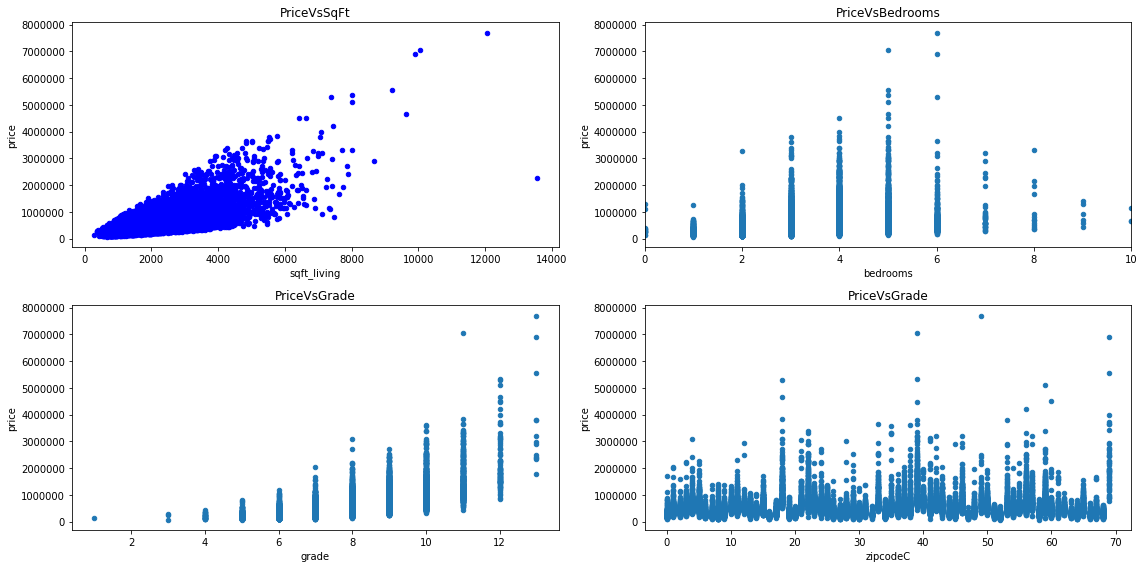

In [33]:
fig = plt.figure(figsize=(16,8))
data.plot(kind='scatter',x='sqft_living',y='price',c='b',title='PriceVsSqFt',ax=plt.subplot(2,2,1))
data.plot(kind='scatter',x='bedrooms',y='price',ax=plt.subplot(2,2,2),xlim=[0,10],title='PriceVsBedrooms')
data.plot(kind='scatter',x='grade',y='price',ax=plt.subplot(2,2,3),title='PriceVsGrade')
data.plot(kind='scatter',x='zipcodeC',y='price',ax=plt.subplot(2,2,4),title='PriceVsGrade')
fig.tight_layout()

### Preliminary observation
From the above visualizations we can clearly see that

<b>SqFt of the apartment</b> seems to be propotional to the cost of the Bedrooms as more bedrooms are offered the price point keeps changing. Thus making it the most important feature as it has more corelation wrt price.

<b>Grade of the houses</b> looks to be a very good measure to predict if the apartment is going to be priced high or low. There is a direct relation to grade and the pricing of the apartments where higher the grader better or higher are the chances for a better selling price for the houses. 

<b>Bedroom</b> The total number of bedrooms also seems to be a good fit as a predictor as these are proportional to sqFt.

<b>The location of the houses</b> also have a very significant impact on the cost of houses. Thus this can help us deduce prices to a certain extent when these features are enumerated for us.



## Method

## Least Square Model (Review and Implementation)


The Least Squares model is the closed form solution for linear regression where the error function can be expressed as following 

\begin{equation}
\frac{1}{2}\sum_{n=1}^{N}(h_w(X^i) - y^i)^2 =\frac{1}{2}(XW - Y)^T (XW - Y)
\end{equation}

on taking the derivative of the Error function wrt to $W$ and solving we get the closed for equation as

\begin{equation}
W = (X^T.X)^{-1}X^TY
\end{equation}

The $(X^T.X)^{-1}$ term is usually the pseudo-inverse.

The complexity of each operations are as follows

$(X^T.X) = O(M^2N)$

$(X^T.X)^{-1} = O(M^3) \hspace{2cm}(using LU decomposition)$

$X^TY = O(MN)$

where $N$ is the number of samples and $M$ is the number of predictors/features.

Closed form solutions thus should not be used as it is more computationally expensive and generally tend to overfit the dataset.

## Least Mean Square Model (Review and Implementatio)


\begin{equation}
h_w(X) = \sum_{i=0}^{n} W_iX_i   \\  n = features
\end{equation}

The cost function thus can be expressed as 
\begin{equation}
J(W) = \frac{1}{2}\sum_{i=0}^{m} (h_w(X)^i - Y^i)^2   \\  m = samples
\end{equation}

The gradient can be calculated by taking partial derivative wrt $W$ 
\begin{equation}
\delta J(X) = \sum_{i=0}^{m} (h_w(X)^i - Y^i) \cdot Xi   \\  m = samples
\end{equation}

<b> Batch Gradient Descent </b>

1. In batch gradient descent we use all the samples to update weights and cost-function 

```
Repeat until convergence {
```
\begin{equation}W_j = W_j - \alpha(h_x(X) - Y^T).X_j\end{equation}
```
}
```




<b> Stochastic Gradient Descent </b>

```
Loop {
    for i=1:m {
```
   \begin{equation}W_j = W_j - \alpha(h_x(X) - Y^T).X_j \hspace{2cm} for \ \ \  every \ \ \  j\end{equation}
```

    }
}
```


1. In sotchastic gradient descent we update the weight per sample thus making the gradient descent faster.
2. Although  the gradient will chage quicker SGD are more prone to oscillations and do not usually reach the global minima.
3. Careful analysis like alpha $\alpha$ learning rate and other parameters of the model are usually tuned to make the function reach the minima quicker. Also SGD won't perform well if the function is not a convex function.

Thus we will use all the above methods discussed and implement the code based on the pseudo code that we have just described above
1. Least Square
2. Batch Gradient Descent
3. Stochastic Gradient Descent

### Super Classs Definition





In [34]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [35]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        Xls = self.add_ones(X)
        self.w = (np.linalg.pinv(np.dot(Xls.transpose(),Xls))) @ (Xls.transpose() @ T)
    
    # apply the learned model to data X
    def use(self, X):
        Xls = self.add_ones(X)
        predicted = np.dot(Xls,self.w)
        return predicted

### Least Mean Squares

In [36]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        N = len(T) #number of samples
        for i in range(N):
            self.train_step(X[i],T[i])

    ## train the LMS in batch mode
    ## break the loop if the cost function has converged
    def train_batch(self,X,T):
        Xlms = self.add_ones(X)
        W = np.zeros((Xlms.shape[1],1))
        alpha = self.alpha
        fig = plt.figure(figsize=(16,8))
        J=[]
        errs = []
        N = len(T) 
        for i in range(N):
            delta = np.asmatrix(sum( ((Xlms @ W) - T)  * Xlms))/N   #multiply and then take the hadamard product.
            W -= (alpha * np.transpose(delta))
            J.append(self.compute_cost(Xlms,T,W))
            Y_lms = np.dot(Xlms,W)
            rmse = np.sqrt(np.mean(T - Y_lms)**2)
            errs.append(rmse)
            print("cost function = {}, iteration = {}, rmse = {}".format(J[i],i,errs[i]))
            if i%500 is 0:
                # Plot the cost 
                ipd.clear_output(wait=True)
                plt.clf()
                plt.subplot(1,2,1)
                plt.plot(J)
                plt.ylabel('Cost Function')
                plt.subplot(1,2,2)
                [x,y,m,b]=bestfit(X,T)
                plt.plot(x, b + m * x, '-',lw=5,color='r')
                [xp,yp,mp,bp]=bestfit(X,Y_lms)
                plt.plot(xp, bp + mp * xp, '-',lw=1,color='g')
                plt.ylabel('Plotting current Estimation')
                ipd.display(fig)
            if(i >1 and np.absolute(errs[i]-errs[i-1]) < 0.1):
                break;
        self.w = W
        ipd.clear_output(wait=True)
    
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x_lms_step = np.insert(x, 0, 1.0, axis=0)
        w = np.zeros((x_lms_step.shape[0],1)) if self.w is None else self.w
        alpha = self.alpha
        u = x_lms_step @ w - t
        res = np.asmatrix(u * x_lms_step)
        w -= (alpha* np.transpose(res))
        j = self.compute_cost(x_lms_step,t,w)
        y_lms_step = np.dot(x_lms_step,w)
        rmse = np.sqrt(np.mean(t - y_lms_step)**2)
        print("cost function = {}, rmse = {}".format(j,rmse))
        self.w = w
    
    # apply the current model to data X
    def use(self, X):
        Xlms = self.add_ones(X) #Need to get this outside
        predicted = np.dot(Xlms,self.w) 
        return predicted
            
    
    # Calculating the cost function value at each iteration. 
    def compute_cost(self,X,Y,W):
        N = len(Y) #length of total samples.
        J = 0 #Initialize the cost function
        res = np.dot(X,W) - Y #normal multiplication is needed here.
        squareError = np.multiply(res,res)#np.array(res) * np.array(res) #res.^2; #elementwise multiplication needed here.
        J = sum(squareError)/2*N
        return J

### Preliminary Test

In [37]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
print(T)
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("eps.",eps)
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

[[ -1]
 [ 17]
 [-12]
 [  5]
 [ 15]
 [ 16]
 [ 21]]
training  LS ...
training  LMS_All ...
cost function = 0.08000000000000002, rmse = 0.4
cost function = 4.938595919999998, rmse = 3.1427999999999994
cost function = 85.12776162000006, rmse = 13.048200000000005
cost function = 2.2397437951999986, rmse = 2.1164799999999993
cost function = 0.03711395635200019, rmse = 0.2724480000000007
cost function = 0.009083363327999971, rmse = 0.1347839999999998
cost function = 0.04151071623167914, rmse = 0.288134399999997
training  LMS_1STEP ...
cost function = 0.08000000000000002, rmse = 0.4
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


---

## Experimentations

### Defining all the helper functions

#### Normalize features 

In [38]:
def normalize_features(X):
    X_norm = X
    mu = np.zeros((1,X.shape[1])) #Setting the size to be equal to the features we are using. (MEAN)
    sigma = np.zeros((1,X.shape[1])) #Setting the size to be equal to the feature we are using. (STDDEV)
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=  np.divide((X-mu),sigma) #(X-mu)./sigma
    return X_norm,mu,sigma

#### Partition data

In [39]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

#### Bestfit function 

In [40]:
from numpy.polynomial.polynomial import polyfit

def bestfit(X,Y):
    x = np.ravel(X[:,0])
    y = np.ravel(np.transpose(Y))
    b,m = polyfit(x,y,1)
    return x,y,b,m

### Splitting data into Training dataset and Testing dataset

In [41]:
Xlst,Tlst = partition(Xraw,Yraw)

In [42]:
Xtrain, Xtest = [xx.values for xx in Xlst]
Ttrain, Ttest = [tt.values for tt in Tlst]

print('The size of the Training dataset is {}'.format(Xtrain.shape))
print('The size of the Testing dataset is {}'.format(Xtest.shape))

The size of the Training dataset is (17290, 4)
The size of the Testing dataset is (4323, 4)


### Normalize the features.

In [44]:
[Xnorm,mu,sigma] = normalize_features(Xtrain)
# We will need the value of mu and sigma for normailzing the features for our test.
print('The value of the mean(mu) is \n{}'.format(mu))
print('The value of the StdDev(sigma) is \n{}'.format(sigma))

The value of the mean(mu) is 
[2054.03545402    3.36674378    7.59491035   31.81359167]
The value of the StdDev(sigma) is 
[904.10992921   0.93593134   1.16926992  19.39289998]


### Performing LMS on the given dataset and using  BATCH GRADIENT DESCENT

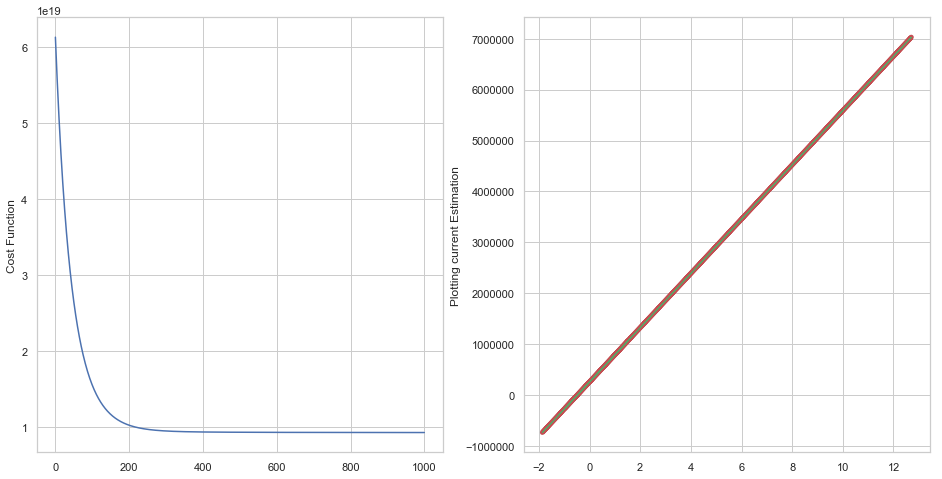

In [89]:
import IPython.display as ipd  # for display and clear_output
lms = LMS(0.01);
lms.train_batch(Xnorm,Ttrain)

### Normalizing the test data before prediction

In [50]:
Xtest_normalize = np.transpose(np.asarray([(Xtest[:,0]-mu[0])/sigma[0],
                                           (Xtest[:,1]-mu[1])/sigma[1],
                                           (Xtest[:,2]-mu[2])/sigma[2],
                                           (Xtest[:,3]-mu[3])/sigma[3]]))

### Calculating the predicted prices for the test data.


In [91]:
predicted = lms.use(Xtest_normalize)
for i in range(Xtest.shape[0]): 
    print("House with {} sq.ft for {} bedroom with grade {} with pincode {} predicted ${} and expected ${}"
          .format(Xtest[i][0],Xtest[i][1],Xtest[i][2],Xtest[i][3],predicted[i],Ttest[i]))

House with 2270 sq.ft for 4 bedroom with grade 8 with pincode 41 predicted $[595677.7470917] and expected $[380000.]
House with 2270 sq.ft for 4 bedroom with grade 8 with pincode 41 predicted $[595677.7470917] and expected $[624900.]
House with 1470 sq.ft for 3 bedroom with grade 8 with pincode 55 predicted $[469916.69945242] and expected $[379770.]
House with 1280 sq.ft for 3 bedroom with grade 8 with pincode 50 predicted $[428938.41570133] and expected $[340000.]
House with 2830 sq.ft for 4 bedroom with grade 8 with pincode 36 predicted $[711203.1397152] and expected $[515500.]
House with 1970 sq.ft for 4 bedroom with grade 7 with pincode 11 predicted $[429692.85358726] and expected $[600000.]
House with 1390 sq.ft for 1 bedroom with grade 6 with pincode 14 predicted $[326413.30805867] and expected $[400000.]
House with 1020 sq.ft for 4 bedroom with grade 6 with pincode 60 predicted $[149096.27519007] and expected $[364000.]
House with 2250 sq.ft for 4 bedroom with grade 8 with pinco

House with 2400 sq.ft for 4 bedroom with grade 8 with pincode 36 predicted $[621474.36526044] and expected $[440000.]
House with 1960 sq.ft for 4 bedroom with grade 8 with pincode 19 predicted $[525134.54361761] and expected $[298000.]
House with 1890 sq.ft for 4 bedroom with grade 8 with pincode 17 predicted $[509995.25952817] and expected $[300000.]
House with 1590 sq.ft for 3 bedroom with grade 7 with pincode 51 predicted $[398493.43054597] and expected $[310000.]
House with 2590 sq.ft for 4 bedroom with grade 9 with pincode 62 predicted $[763440.83764098] and expected $[500000.]
House with 860 sq.ft for 3 bedroom with grade 7 with pincode 25 predicted $[239243.61971315] and expected $[399900.]
House with 1270 sq.ft for 3 bedroom with grade 8 with pincode 64 predicted $[430577.62007768] and expected $[343000.]
House with 1130 sq.ft for 2 bedroom with grade 8 with pincode 23 predicted $[427902.26454988] and expected $[415000.]
House with 1860 sq.ft for 3 bedroom with grade 8 with pin

House with 1760 sq.ft for 3 bedroom with grade 8 with pincode 3 predicted $[516592.32266082] and expected $[688000.]
House with 1430 sq.ft for 4 bedroom with grade 6 with pincode 64 predicted $[235716.16686381] and expected $[285000.]
House with 1510 sq.ft for 3 bedroom with grade 8 with pincode 12 predicted $[466819.66486111] and expected $[530000.]
House with 1320 sq.ft for 4 bedroom with grade 7 with pincode 32 predicted $[299645.21415464] and expected $[195000.]
House with 1180 sq.ft for 3 bedroom with grade 7 with pincode 47 predicted $[311873.53887224] and expected $[250200.]
House with 1560 sq.ft for 3 bedroom with grade 7 with pincode 39 predicted $[389039.63772412] and expected $[1100000.]
House with 2470 sq.ft for 3 bedroom with grade 9 with pincode 23 predicted $[765471.18777765] and expected $[732500.]
House with 2190 sq.ft for 3 bedroom with grade 7 with pincode 27 predicted $[517309.0801119] and expected $[194250.]
House with 1610 sq.ft for 4 bedroom with grade 7 with pin

House with 1750 sq.ft for 2 bedroom with grade 8 with pincode 65 predicted $[568456.39720359] and expected $[661000.]
House with 2320 sq.ft for 3 bedroom with grade 8 with pincode 22 predicted $[638505.00681806] and expected $[900000.]
House with 2380 sq.ft for 5 bedroom with grade 8 with pincode 11 predicted $[573197.21811054] and expected $[600000.]
House with 6490 sq.ft for 5 bedroom with grade 11 with pincode 18 predicted $[1718898.25028625] and expected $[2000000.]
House with 1620 sq.ft for 4 bedroom with grade 7 with pincode 38 predicted $[363843.50758791] and expected $[512500.]
House with 1770 sq.ft for 3 bedroom with grade 8 with pincode 19 predicted $[522937.23270164] and expected $[229500.]
House with 2320 sq.ft for 3 bedroom with grade 8 with pincode 24 predicted $[639037.28111254] and expected $[589000.]
House with 1330 sq.ft for 3 bedroom with grade 8 with pincode 25 predicted $[432718.56544532] and expected $[539950.]
House with 3420 sq.ft for 4 bedroom with grade 9 with

House with 1450 sq.ft for 3 bedroom with grade 7 with pincode 2 predicted $[356238.69074133] and expected $[400000.]
House with 2690 sq.ft for 3 bedroom with grade 10 with pincode 25 predicted $[907310.51567943] and expected $[979000.]
House with 2755 sq.ft for 4 bedroom with grade 7 with pincode 5 predicted $[591903.2119759] and expected $[625250.]
House with 2650 sq.ft for 4 bedroom with grade 8 with pincode 24 predicted $[670448.61161843] and expected $[665000.]
House with 2310 sq.ft for 3 bedroom with grade 8 with pincode 43 predicted $[642007.17122509] and expected $[589500.]
House with 1460 sq.ft for 2 bedroom with grade 8 with pincode 3 predicted $[491441.13920992] and expected $[437000.]
House with 1400 sq.ft for 3 bedroom with grade 7 with pincode 36 predicted $[354853.77532249] and expected $[320000.]
House with 2196 sq.ft for 3 bedroom with grade 8 with pincode 20 predicted $[612097.45802965] and expected $[333500.]
House with 2020 sq.ft for 3 bedroom with grade 8 with pinco

House with 1110 sq.ft for 2 bedroom with grade 7 with pincode 3 predicted $[323006.78169768] and expected $[399000.]
House with 2760 sq.ft for 4 bedroom with grade 10 with pincode 42 predicted $[888991.56987853] and expected $[847093.]
House with 1510 sq.ft for 3 bedroom with grade 8 with pincode 12 predicted $[466819.66486111] and expected $[599950.]
House with 1460 sq.ft for 3 bedroom with grade 8 with pincode 25 predicted $[459845.86935025] and expected $[499000.]
House with 3980 sq.ft for 4 bedroom with grade 9 with pincode 48 predicted $[1049768.39779387] and expected $[760000.]
House with 3320 sq.ft for 4 bedroom with grade 10 with pincode 39 predicted $[1005049.23679651] and expected $[1699990.]
House with 3270 sq.ft for 4 bedroom with grade 9 with pincode 23 predicted $[894958.15547828] and expected $[1033890.]
House with 2670 sq.ft for 4 bedroom with grade 9 with pincode 36 predicted $[773214.99729272] and expected $[515000.]
House with 1410 sq.ft for 3 bedroom with grade 7 wi

House with 3860 sq.ft for 5 bedroom with grade 9 with pincode 54 predicted $[988874.34535844] and expected $[820875.]
House with 2490 sq.ft for 4 bedroom with grade 8 with pincode 54 predicted $[645045.27507569] and expected $[595500.]
House with 3236 sq.ft for 4 bedroom with grade 10 with pincode 20 predicted $[982464.21924501] and expected $[450000.]
House with 2830 sq.ft for 4 bedroom with grade 8 with pincode 54 predicted $[715993.60836551] and expected $[695000.]
House with 1451 sq.ft for 3 bedroom with grade 7 with pincode 34 predicted $[364963.75102148] and expected $[300000.]
House with 2910 sq.ft for 5 bedroom with grade 8 with pincode 64 predicted $[697898.41821892] and expected $[515000.]
House with 1280 sq.ft for 3 bedroom with grade 8 with pincode 33 predicted $[424414.08419826] and expected $[545000.]
House with 1110 sq.ft for 3 bedroom with grade 7 with pincode 38 predicted $[294871.29475212] and expected $[365000.]
House with 2840 sq.ft for 4 bedroom with grade 9 with p

### Plotting the actual - predicted    and   residual plots 

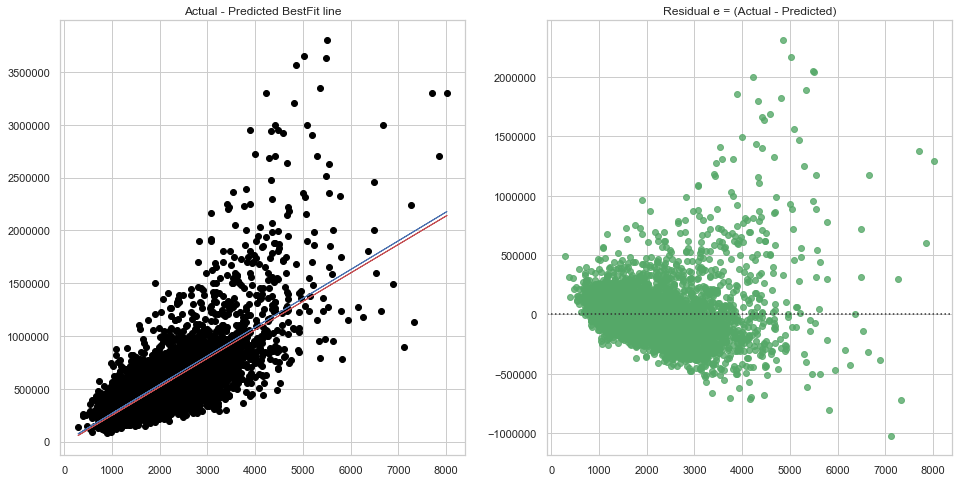

In [92]:
import seaborn as sns

fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Actual - Predicted BestFit line')
plt.plot(Xtest[:,0],Ttest,'o',color='black')

##ACTUAL
[x,y,b,m] = bestfit(Xtest,Ttest)
plt.plot(x, b + m * x, '-',lw=1,color='r')

##PREDICTED
[xp,yp,bp,mp] = bestfit(Xtest,predicted)
plt.plot(xp, bp + mp * xp, '-',lw=1,color='b')

sns.set(style="whitegrid")
plt.subplot(1,2,2)
plt.title('Residual e = (Actual - Predicted)')
residual=(Ttest - predicted)
sns.residplot(np.array(Xtest[:,0]), np.array(residual), color="g")



### Step Gradient / Stochastic Gradient Descent

In [93]:
lms_sgd = LMS(0.001)
lms_sgd.train(Xnorm,Ttrain)


cost function = 24372353323.400818, rmse = 220782.03424826404
cost function = 143080690832.83945, rmse = 534940.5403086205
cost function = 15292154534.71371, rmse = 174883.7015545686
cost function = 179117640353.87088, rmse = 598527.5939401138
cost function = 126731782522.83888, rmse = 503451.65115001635
cost function = 709561317176.2018, rmse = 1191269.3374516123
cost function = 31293985823.354767, rmse = 250175.88142486784
cost function = 41036342006.8695, rmse = 286483.3049476688
cost function = 24375022091.01529, rmse = 220794.1217107706
cost function = 49065764927.69118, rmse = 313259.5247640243
cost function = 205501817121.6751, rmse = 641095.6513995008
cost function = 105198417629.97371, rmse = 458690.34790362377
cost function = 43713831703.95198, rmse = 295681.6927168538
cost function = 74185727405.92671, rmse = 385190.1540951604
cost function = 133359661865.01952, rmse = 516448.76196002157
cost function = 196148626640.62442, rmse = 626336.3739088197
cost function = 72263072936

cost function = 26547223865.1219, rmse = 230422.32472189798
cost function = 5026637835.157172, rmse = 100266.02450638174
cost function = 313200706.8280596, rmse = 25028.012579030707
cost function = 40112240044.01869, rmse = 283239.2629704388
cost function = 245183903054.2828, rmse = 700262.6693666924
cost function = 1340271511529.9324, rmse = 1637236.398037823
cost function = 21792217888.076385, rmse = 208768.857294743
cost function = 1056611252.2174412, rmse = 45969.79991728137
cost function = 17784912383.91231, rmse = 188599.64148381783
cost function = 28140972245.3656, rmse = 237238.15985361882
cost function = 2181844288.788975, rmse = 66058.22112029622
cost function = 19014675441.010662, rmse = 195011.15578864026
cost function = 25728412.22265121, rmse = 7173.3412330170395
cost function = 35135842689.25434, rmse = 265088.0709849251
cost function = 330286.7269298946, rmse = 812.7567002860014
cost function = 33851212057.09373, rmse = 260196.89489728247
cost function = 41596912590.855

cost function = 3739292439.091311, rmse = 86478.81172970997
cost function = 2888048167.708858, rmse = 76000.63378300023
cost function = 4581414455.58147, rmse = 95722.66665300826
cost function = 14347966216.399828, rmse = 169398.73799057552
cost function = 205914.08287891492, rmse = 641.7383935513208
cost function = 34410175638.754456, rmse = 262336.3323626922
cost function = 102345351.47659308, rmse = 14307.015864714282
cost function = 23029738476.49967, rmse = 214614.71746597282
cost function = 1651542757.4456446, rmse = 57472.47615068703
cost function = 43646935236.21369, rmse = 295455.36121794675
cost function = 4000342016.9144998, rmse = 89446.5428836073
cost function = 6666808891.467715, rmse = 115471.28553426359
cost function = 20334696137.71443, rmse = 201666.53732195846
cost function = 3509025879.866794, rmse = 83773.81309056899
cost function = 1411118631.3730087, rmse = 53124.73306046834
cost function = 99951433458.34502, rmse = 447104.9842225985
cost function = 1984783462.55

cost function = 34375658336.66318, rmse = 262204.7228280344
cost function = 520906233.24589765, rmse = 32277.119860542007
cost function = 9615106293.058775, rmse = 138673.04203094973
cost function = 42704710.85728307, rmse = 9241.721793830744
cost function = 16185203978.701462, rmse = 179917.78110404464
cost function = 10431970552.069876, rmse = 144443.5568107479
cost function = 1464804.445928744, rmse = 1711.6100291414186
cost function = 80054794461.74315, rmse = 400136.96270587936
cost function = 14426711102.244543, rmse = 169862.9512415497
cost function = 910566585.4982948, rmse = 42674.73691771971
cost function = 56099035152.55746, rmse = 334959.8040140263
cost function = 62681189699.13864, rmse = 354065.50156472076
cost function = 66337650336.836624, rmse = 364246.2088665759
cost function = 92988811561.68565, rmse = 431251.22970650333
cost function = 19238888050.52326, rmse = 196157.5287901194
cost function = 8551153411.857998, rmse = 130775.78836969784
cost function = 15232199342

cost function = 28462910923.937794, rmse = 238591.3281070282
cost function = 9234492269.7332, rmse = 135900.64215987502
cost function = 10010941342.964235, rmse = 141498.70206446585
cost function = 568321100.0752816, rmse = 33714.12463865202
cost function = 39242743930.060265, rmse = 280152.6153012328
cost function = 53798534.54163222, rmse = 10372.900707288412
cost function = 8295181350.970198, rmse = 128803.58186766545
cost function = 2974088233.5677347, rmse = 77124.42198898783
cost function = 267577438.62151533, rmse = 23133.41473373593
cost function = 24063503114.149128, rmse = 219378.68225581595
cost function = 172857856.6200553, rmse = 18593.43199197261
cost function = 45922336536.69769, rmse = 303058.86074060824
cost function = 20652075873.514095, rmse = 203234.22877809778
cost function = 24249126157.701202, rmse = 220223.18750622607
cost function = 11749077182.731714, rmse = 153291.07725325512
cost function = 499957990.19393337, rmse = 31621.448107065982
cost function = 822913

cost function = 7431627122.904559, rmse = 121914.94676949631
cost function = 22550705012.679546, rmse = 212370.92556505726
cost function = 10158385710.24373, rmse = 142536.91248405608
cost function = 4675038886.367837, rmse = 96695.80018147465
cost function = 14689283829.793049, rmse = 171401.77262673248
cost function = 1031182502.9193581, rmse = 45413.26905034162
cost function = 7773336046.645091, rmse = 124686.29472917295
cost function = 1881705309.0279067, rmse = 61346.6430870982
cost function = 1196276820.2248397, rmse = 48913.73672548111
cost function = 47703584011.35076, rmse = 308880.50767683855
cost function = 23588914.622298237, rmse = 6868.6118862981675
cost function = 7129557426.282346, rmse = 119411.53567626828
cost function = 5449159500.836532, rmse = 104395.01425677887
cost function = 452189750.99641156, rmse = 30072.903118801536
cost function = 316317339.26616883, rmse = 25152.230090636847
cost function = 3429364690.317653, rmse = 82817.44611273223
cost function = 122761

cost function = 2928694145.8355083, rmse = 76533.57623730265
cost function = 25560074025.301746, rmse = 226097.65158135432
cost function = 442210529.2103694, rmse = 29739.21751527331
cost function = 507479686.97787344, rmse = 31858.427047733334
cost function = 4535747452.037523, rmse = 95244.3956570414
cost function = 508056587.7476422, rmse = 31876.530167119578
cost function = 135747720635.95172, rmse = 521052.24428257043
cost function = 28973349219.577316, rmse = 240721.204797489
cost function = 215005.75075616504, rmse = 655.7526221924927
cost function = 168460588.87766832, rmse = 18355.412764504552
cost function = 858661509.4715378, rmse = 41440.59626674157
cost function = 9480396527.34441, rmse = 137698.19553897146
cost function = 151976567.2590041, rmse = 17434.251762493514
cost function = 7041747696.12332, rmse = 118673.90358560992
cost function = 26769042927.228985, rmse = 231382.98523110547
cost function = 7322434981.846851, rmse = 121015.99052891193
cost function = 6950613937

cost function = 3448841446.8152623, rmse = 83052.29011671216
cost function = 5462818397.619876, rmse = 104525.77096218785
cost function = 12328453092.352028, rmse = 157025.17691346206
cost function = 3073283.74339478, rmse = 2479.2271954763564
cost function = 19132278042.105423, rmse = 195613.281972904
cost function = 2380849459.33616, rmse = 69005.06444220105
cost function = 5907480417.170321, rmse = 108696.64592038083
cost function = 606651337.3047566, rmse = 34832.4945217754
cost function = 1743430129.661243, rmse = 59049.64233018254
cost function = 31644870645.971287, rmse = 251574.52433015266
cost function = 33124617483.695496, rmse = 257389.2673896699
cost function = 15300485064.294453, rmse = 174931.32975138817
cost function = 10492165521.695549, rmse = 144859.69433693797
cost function = 7138.339516469592, rmse = 119.485057781043
cost function = 12642410873.983124, rmse = 159012.0176212045
cost function = 140279432761.95273, rmse = 529678.077254388
cost function = 13940060448.06

cost function = 4264386937.2412143, rmse = 92351.36097796517
cost function = 4039564792.965267, rmse = 89883.97847186413
cost function = 2221384512.6092567, rmse = 66654.09983803332
cost function = 57058909262.99462, rmse = 337813.2894455001
cost function = 247753124.86087847, rmse = 22259.96967027936
cost function = 49435072602.66342, rmse = 314436.2339256194
cost function = 5206706858.872649, rmse = 102046.13524159207
cost function = 48905630292.665665, rmse = 312747.91859472275
cost function = 38897307333.98158, rmse = 278916.8597771801
cost function = 78090771.85428223, rmse = 12497.261448355974
cost function = 37629632324.52626, rmse = 274334.22070360184
cost function = 26188796.001943767, rmse = 7237.2364894265775
cost function = 11052377211.389507, rmse = 148676.67746751342
cost function = 14183428962.356255, rmse = 168424.6357416649
cost function = 612871471.3794019, rmse = 35010.61185924639
cost function = 71474454951.7193, rmse = 378085.84991168155
cost function = 35925593156

cost function = 97560954107.67494, rmse = 441726.05562197696
cost function = 8936041877.51202, rmse = 133686.51298849873
cost function = 15455920708.023264, rmse = 175817.63681737543
cost function = 391232147.707422, rmse = 27972.563261432515
cost function = 2756571148.893613, rmse = 74250.53735689208
cost function = 123387472170.25198, rmse = 496764.4757231579
cost function = 23147963323.91837, rmse = 215164.8824688563
cost function = 44715729066.340805, rmse = 299050.928994848
cost function = 40094141796.798065, rmse = 283175.35837992
cost function = 2639936244.8827186, rmse = 72662.7310921179
cost function = 11449551026.915958, rmse = 151324.49257748039
cost function = 7127915767.202809, rmse = 119397.78697448969
cost function = 9760252221.325798, rmse = 139715.79882980877
cost function = 33038226817.90038, rmse = 257053.4061937339
cost function = 11624927672.881632, rmse = 152479.03247910272
cost function = 67569910441.375916, rmse = 367613.68429745897
cost function = 332514419.639

cost function = 182233115582.25644, rmse = 603710.3868284137
cost function = 4233442519.6472497, rmse = 92015.67822547688
cost function = 378631476.53106964, rmse = 27518.411165293306
cost function = 21066358485.63662, rmse = 205262.55618420336
cost function = 225511487471.27396, rmse = 671582.4409129142
cost function = 17945032195.04717, rmse = 189446.73232889065
cost function = 51261385209.980606, rmse = 320191.7713183167
cost function = 15547905822.148563, rmse = 176340.04549250045
cost function = 45772422584.96678, rmse = 302563.786944065
cost function = 9801664.882675868, rmse = 4427.564766929077
cost function = 73869921942.23036, rmse = 384369.4107033762
cost function = 10684778262.350763, rmse = 146183.29769403045
cost function = 188811625.82798317, rmse = 19432.530757880362
cost function = 639871116.9667218, rmse = 35773.48506832181
cost function = 17551658353.573284, rmse = 187358.7913793921
cost function = 27296678520.293537, rmse = 233652.21385766298
cost function = 83379423

cost function = 29954227402.75841, rmse = 244762.0371003576
cost function = 271695373.3339459, rmse = 23310.743159922888
cost function = 52675874120.954704, rmse = 324579.3404422244
cost function = 23213383666.72563, rmse = 215468.7154402032
cost function = 14229769593.22964, rmse = 168699.55301203165
cost function = 950248620.2721921, rmse = 43594.692802500445
cost function = 2487853853.396127, rmse = 70538.69652036572
cost function = 21217802488.47211, rmse = 205999.041203944
cost function = 43847047370.57295, rmse = 296131.8874102313
cost function = 12293318695.564487, rmse = 156801.26718597964
cost function = 34422337616.78594, rmse = 262382.6885173103
cost function = 6280860100.945652, rmse = 112079.08012600435
cost function = 4486281206.104486, rmse = 94723.61063752254
cost function = 4020946355.903158, rmse = 89676.60069274658
cost function = 2606001370.0939803, rmse = 72194.20156901772
cost function = 2396376897.0794826, rmse = 69229.71756521158
cost function = 25178349281.7188

cost function = 12062725509.376957, rmse = 155323.69754404482
cost function = 11685271291.93854, rmse = 152874.27050971356
cost function = 14947044417.427628, rmse = 172899.07123768842
cost function = 2554763720.5417275, rmse = 71480.95859096642
cost function = 9732211093.832228, rmse = 139514.953276215
cost function = 158661050.12753507, rmse = 17813.536994518247
cost function = 26197011519.374676, rmse = 228897.40723465907
cost function = 25395163841.936832, rmse = 225367.09538855415
cost function = 50454298525.234314, rmse = 317661.1355681847
cost function = 10342822763.04105, rmse = 143825.0518028139
cost function = 27687879062.266666, rmse = 235320.543354237
cost function = 76746596.25082457, rmse = 12389.236962042865
cost function = 3786175.7443281743, rmse = 2751.790596803534
cost function = 295893575.0966992, rmse = 24326.675691376295
cost function = 1203575968.1928291, rmse = 49062.734701458074
cost function = 9266411019.128181, rmse = 136135.30783105595
cost function = 286751

cost function = 15928489840.565273, rmse = 178485.2365915191
cost function = 165567746.6213783, rmse = 18197.128708748438
cost function = 7395717492.613489, rmse = 121620.0435176167
cost function = 3367660418.964108, rmse = 82069.00046868011
cost function = 1738302193.6143167, rmse = 58962.737277272274
cost function = 9521326516.170868, rmse = 137995.11959609925
cost function = 44091495489.80004, rmse = 296956.2105422281
cost function = 2206080071.7716956, rmse = 66424.09309537761
cost function = 3908652069.545643, rmse = 88415.51978635474
cost function = 4147823579.625407, rmse = 91080.44334131677
cost function = 3722743168.056077, rmse = 86287.2315937425
cost function = 42173790732.6592, rmse = 290426.550895951
cost function = 8954904087.615997, rmse = 133827.53145460016
cost function = 4717310094.324532, rmse = 97131.973050325
cost function = 66912546741.67079, rmse = 365821.12224875914
cost function = 90110294611.00159, rmse = 424523.9560048445
cost function = 5198378047.666419, rm

cost function = 438093347.6666351, rmse = 29600.450931248837
cost function = 2864248710.349582, rmse = 75686.8378299633
cost function = 3723017895.5158777, rmse = 86290.41540653142
cost function = 8641150117.386614, rmse = 131462.16274948936
cost function = 33461826583.324406, rmse = 258696.06329948048
cost function = 237418571.04442635, rmse = 21790.75818067955
cost function = 19524301.26340899, rmse = 6248.888103240286
cost function = 5469283347.377084, rmse = 104587.60296877526
cost function = 22705289113.36745, rmse = 213097.57911983633
cost function = 6228516.920505861, rmse = 3529.452342929668
cost function = 14515822631.908367, rmse = 170386.75201968238
cost function = 122276927.80520274, rmse = 15638.217788814858
cost function = 3302246.419121896, rmse = 2569.9207844297052
cost function = 69875090613.83206, rmse = 373831.7552424675
cost function = 814095269674.6158, rmse = 1276005.697224441
cost function = 3790736540.735847, rmse = 87071.65486811247
cost function = 2462294178.9

cost function = 12802897510.966822, rmse = 160018.10841880878
cost function = 3961656798.7839956, rmse = 89012.9967901766
cost function = 21192092599.289158, rmse = 205874.19750560855
cost function = 12223631.168047313, rmse = 4944.417289842619
cost function = 80364682709.13693, rmse = 400910.67012275173
cost function = 28602482616.771458, rmse = 239175.5949789671
cost function = 791934279.6404381, rmse = 39797.846163842536
cost function = 115138100.98151872, rmse = 15174.854264968657
cost function = 34107182424.158688, rmse = 261178.79861948476
cost function = 8871842314.335402, rmse = 133205.42266991537
cost function = 35976715374.86079, rmse = 268241.3665893491
cost function = 222789413610.08398, rmse = 667516.9115611739
cost function = 901038381.1501983, rmse = 42450.874694173224
cost function = 7653219289.366362, rmse = 123719.19244293799
cost function = 2430116130.2811604, rmse = 69715.36602903495
cost function = 2079662498.769019, rmse = 64492.829039653996
cost function = 225060

cost function = 21962368887.01809, rmse = 209582.2935603964
cost function = 11825552980.339891, rmse = 153789.1607385897
cost function = 51557339252.45206, rmse = 321114.7435184254
cost function = 12654687992.029734, rmse = 159089.2076291144
cost function = 7405446132.641956, rmse = 121700.00930683577
cost function = 11141976869.31075, rmse = 149278.10870526696
cost function = 24267207934.40692, rmse = 220305.2788037859
cost function = 277440257.7326798, rmse = 23555.901924260077
cost function = 141567073476.38895, rmse = 532103.5115020177
cost function = 65668563050.530106, rmse = 362404.6441494096
cost function = 620947374.3797368, rmse = 35240.52707834367
cost function = 614305576.6451198, rmse = 35051.54994133982
cost function = 1887071934.2100832, rmse = 61434.061142172315
cost function = 3214266016.5356584, rmse = 80178.12689924426
cost function = 12302165574.605051, rmse = 156857.67800528638
cost function = 1030115555.8134247, rmse = 45389.76879900193
cost function = 15494293728

cost function = 74017005968.83594, rmse = 384751.8836050993
cost function = 11554898054.152374, rmse = 152019.06495010667
cost function = 9305218518.16721, rmse = 136420.07563527598
cost function = 6465314083.862356, rmse = 113712.91996833391
cost function = 203141441.6157981, rmse = 20156.460086820705
cost function = 15466395119.060911, rmse = 175877.2021557138
cost function = 5079583152.50166, rmse = 100792.6897398979
cost function = 830950827.1753457, rmse = 40766.42803031302
cost function = 1906379759.850027, rmse = 61747.54666948359
cost function = 272512638.6344822, rmse = 23345.776433200168
cost function = 1155361383.7702641, rmse = 48069.977819222346
cost function = 156655388483.83096, rmse = 559741.7055818352
cost function = 38297549425.856285, rmse = 276758.19563603273
cost function = 22032825.152982183, rmse = 6638.196314207977
cost function = 7151949789.081007, rmse = 119598.91127498617
cost function = 56640279696.62362, rmse = 336571.77450470685
cost function = 25852044915

cost function = 44249863300.157005, rmse = 297489.03610102006
cost function = 3990224066.5401316, rmse = 89333.35397868068
cost function = 11378991483.40416, rmse = 150857.49224618683
cost function = 28941203439.539455, rmse = 240587.62827518565
cost function = 32039635890.861813, rmse = 253138.83894361928
cost function = 2116514840.9036655, rmse = 65061.737463791505
cost function = 1611258708.179677, rmse = 56767.22131969605
cost function = 68810104.58230047, rmse = 11731.164015757386
cost function = 3465978.0942494767, rmse = 2632.8608372830786
cost function = 84320053.89793037, rmse = 12986.150615015242
cost function = 330.9609278920769, rmse = 25.727842035121284
cost function = 11429041071.060503, rmse = 151188.89556485624
cost function = 2771649732.9621654, rmse = 74453.33750695351
cost function = 2803824490.3095117, rmse = 74884.23719728354
cost function = 14304197853.840618, rmse = 169140.1658615754
cost function = 376212700.2722599, rmse = 27430.373685834464
cost function = 922

### Calculating the predicted prices for the test data using LMS SGD

In [94]:

predicted_sgd = lms_sgd.use(Xtest_normalize)
for i in range(Xtest.shape[0]): 
    print("House with {} sq.ft for {} bedroom with grade {} with pincode {} predicted ${} and expected ${}"
          .format(Xtest[i][0],Xtest[i][1],Xtest[i][2],Xtest[i][3],predicted[i],Ttest[i]))

House with 2270 sq.ft for 4 bedroom with grade 8 with pincode 41 predicted $[595677.7470917] and expected $[380000.]
House with 2270 sq.ft for 4 bedroom with grade 8 with pincode 41 predicted $[595677.7470917] and expected $[624900.]
House with 1470 sq.ft for 3 bedroom with grade 8 with pincode 55 predicted $[469916.69945242] and expected $[379770.]
House with 1280 sq.ft for 3 bedroom with grade 8 with pincode 50 predicted $[428938.41570133] and expected $[340000.]
House with 2830 sq.ft for 4 bedroom with grade 8 with pincode 36 predicted $[711203.1397152] and expected $[515500.]
House with 1970 sq.ft for 4 bedroom with grade 7 with pincode 11 predicted $[429692.85358726] and expected $[600000.]
House with 1390 sq.ft for 1 bedroom with grade 6 with pincode 14 predicted $[326413.30805867] and expected $[400000.]
House with 1020 sq.ft for 4 bedroom with grade 6 with pincode 60 predicted $[149096.27519007] and expected $[364000.]
House with 2250 sq.ft for 4 bedroom with grade 8 with pinco

House with 2050 sq.ft for 3 bedroom with grade 8 with pincode 54 predicted $[590680.07203486] and expected $[457000.]
House with 1310 sq.ft for 4 bedroom with grade 7 with pincode 7 predicted $[290905.06978867] and expected $[320000.]
House with 1250 sq.ft for 3 bedroom with grade 7 with pincode 34 predicted $[323020.76575309] and expected $[210000.]
House with 2130 sq.ft for 4 bedroom with grade 8 with pincode 20 predicted $[560874.84740976] and expected $[220000.]
House with 2250 sq.ft for 3 bedroom with grade 7 with pincode 43 predicted $[534087.5685777] and expected $[589000.]
House with 1880 sq.ft for 4 bedroom with grade 7 with pincode 38 predicted $[418098.11539777] and expected $[435000.]
House with 1520 sq.ft for 3 bedroom with grade 7 with pincode 2 predicted $[370845.70053629] and expected $[375000.]
House with 4010 sq.ft for 4 bedroom with grade 10 with pincode 39 predicted $[1149032.61906113] and expected $[1735000.]
House with 1660 sq.ft for 2 bedroom with grade 8 with pi

House with 1860 sq.ft for 3 bedroom with grade 6 with pincode 4 predicted $[346926.99958316] and expected $[1052000.]
House with 2510 sq.ft for 3 bedroom with grade 9 with pincode 55 predicted $[782334.43922928] and expected $[699950.]
House with 2040 sq.ft for 4 bedroom with grade 8 with pincode 9 predicted $[539166.89762517] and expected $[375000.]
House with 2410 sq.ft for 4 bedroom with grade 7 with pincode 15 predicted $[522572.89231598] and expected $[625000.]
House with 780 sq.ft for 2 bedroom with grade 7 with pincode 43 predicted $[264790.64998243] and expected $[464050.]
House with 2210 sq.ft for 5 bedroom with grade 8 with pincode 62 predicted $[551296.04597483] and expected $[470000.]
House with 1590 sq.ft for 4 bedroom with grade 7 with pincode 26 predicted $[354389.71476606] and expected $[330000.]
House with 2230 sq.ft for 4 bedroom with grade 7 with pincode 35 predicted $[490334.75293086] and expected $[537000.]
House with 1560 sq.ft for 3 bedroom with grade 7 with pinc

House with 1860 sq.ft for 3 bedroom with grade 9 with pincode 26 predicted $[638979.9424347] and expected $[400000.]
House with 4460 sq.ft for 3 bedroom with grade 12 with pincode 59 predicted $[1476506.47200445] and expected $[1550000.]
House with 1080 sq.ft for 2 bedroom with grade 7 with pincode 25 predicted $[322601.65188196] and expected $[345000.]
House with 1080 sq.ft for 2 bedroom with grade 7 with pincode 25 predicted $[322601.65188196] and expected $[874950.]
House with 2280 sq.ft for 3 bedroom with grade 7 with pincode 15 predicted $[532895.87550998] and expected $[875000.]
House with 2540 sq.ft for 4 bedroom with grade 9 with pincode 5 predicted $[737837.44182337] and expected $[628990.]
House with 2560 sq.ft for 2 bedroom with grade 6 with pincode 12 predicted $[532576.48180962] and expected $[535000.]
House with 2390 sq.ft for 4 bedroom with grade 8 with pincode 39 predicted $[620186.06101716] and expected $[770126.]
House with 2870 sq.ft for 4 bedroom with grade 8 with p

House with 4590 sq.ft for 5 bedroom with grade 10 with pincode 59 predicted $[1237934.58463667] and expected $[1710000.]
House with 3070 sq.ft for 4 bedroom with grade 9 with pincode 36 predicted $[856683.6246925] and expected $[535000.]
House with 3030 sq.ft for 4 bedroom with grade 8 with pincode 54 predicted $[757727.9220654] and expected $[622950.]
House with 2610 sq.ft for 3 bedroom with grade 8 with pincode 36 predicted $[702745.68174425] and expected $[515000.]
House with 3150 sq.ft for 4 bedroom with grade 7 with pincode 34 predicted $[682046.45880312] and expected $[330000.]
House with 1240 sq.ft for 3 bedroom with grade 8 with pincode 17 predicted $[411809.02710246] and expected $[318000.]
House with 1680 sq.ft for 3 bedroom with grade 7 with pincode 62 predicted $[420201.38033055] and expected $[439000.]
House with 2220 sq.ft for 3 bedroom with grade 8 with pincode 8 predicted $[613911.92990677] and expected $[540000.]
House with 4800 sq.ft for 4 bedroom with grade 10 with p

House with 1060 sq.ft for 2 bedroom with grade 8 with pincode 49 predicted $[420214.82058314] and expected $[505000.]
House with 1950 sq.ft for 2 bedroom with grade 8 with pincode 38 predicted $[603005.00792802] and expected $[565000.]
House with 3340 sq.ft for 4 bedroom with grade 9 with pincode 23 predicted $[909565.16527324] and expected $[799000.]
House with 1570 sq.ft for 3 bedroom with grade 9 with pincode 46 predicted $[583787.93051464] and expected $[547000.]
House with 1930 sq.ft for 3 bedroom with grade 7 with pincode 29 predicted $[463586.74659652] and expected $[550000.]
House with 1590 sq.ft for 3 bedroom with grade 7 with pincode 9 predicted $[387315.67036192] and expected $[250000.]
House with 3720 sq.ft for 4 bedroom with grade 10 with pincode 41 predicted $[1089050.13849077] and expected $[960000.]
House with 4470 sq.ft for 4 bedroom with grade 11 with pincode 46 predicted $[1342283.80913898] and expected $[2950000.]
House with 1290 sq.ft for 2 bedroom with grade 7 wit

House with 2732 sq.ft for 6 bedroom with grade 7 with pincode 16 predicted $[515130.70032218] and expected $[343000.]
House with 2090 sq.ft for 3 bedroom with grade 7 with pincode 34 predicted $[498304.88329263] and expected $[300000.]
House with 980 sq.ft for 2 bedroom with grade 8 with pincode 25 predicted $[397133.80356944] and expected $[334900.]
House with 2815 sq.ft for 5 bedroom with grade 9 with pincode 68 predicted $[774538.47633786] and expected $[477500.]
House with 3170 sq.ft for 4 bedroom with grade 9 with pincode 59 predicted $[883671.93592894] and expected $[820000.]
House with 3030 sq.ft for 5 bedroom with grade 8 with pincode 64 predicted $[722939.00643886] and expected $[580000.]
House with 1280 sq.ft for 2 bedroom with grade 8 with pincode 15 predicted $[457073.90264689] and expected $[350000.]
House with 2030 sq.ft for 3 bedroom with grade 9 with pincode 39 predicted $[677913.89199371] and expected $[910000.]
House with 2490 sq.ft for 3 bedroom with grade 8 with pin

### Plotting the actual - predicted and residual plots

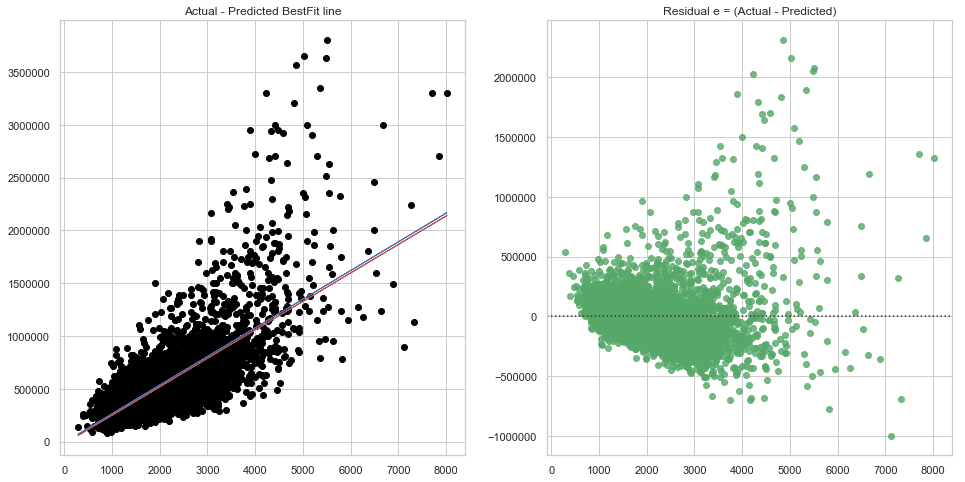

In [95]:
import seaborn as sns

fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Actual - Predicted BestFit line')
plt.plot(Xtest[:,0],Ttest,'o',color='black')

##ACTUAL
[x,y,b,m] = bestfit(Xtest,Ttest)
plt.plot(x, b + m * x, '-',lw=1,color='r')

##PREDICTED
[xp,yp,bp,mp] = bestfit(Xtest,predicted_sgd)
plt.plot(xp, bp + mp * xp, '-',lw=1,color='b')

sns.set(style="whitegrid")
plt.subplot(1,2,2)
plt.title('Residual e = (Actual - Predicted)')
residual=(Ttest - predicted_sgd)
sns.residplot(np.array(Xtest[:,0]), np.array(residual), color="g")

### Linear Regression Closed Form (Least Square)


In [47]:
lr = LinearRegress()
lr.train(Xnorm,Ttrain)

### Calculating the predicted prices for the test data using LS Closed Form

In [51]:
predicted_lr = lr.use(Xtest_normalize)
for i in range(Xtest.shape[0]): 
    print("House with {} sq.ft for {} bedroom with grade {} with pincode {} predicted ${} and expected ${}"
          .format(Xtest[i][0],Xtest[i][1],Xtest[i][2],Xtest[i][3],predicted_lr[i],Ttest[i]))

House with 2270 sq.ft for 4 bedroom with grade 8 with pincode 41 predicted $[593167.21533906] and expected $[380000.]
House with 2270 sq.ft for 4 bedroom with grade 8 with pincode 41 predicted $[593167.21533906] and expected $[624900.]
House with 1470 sq.ft for 3 bedroom with grade 8 with pincode 55 predicted $[462722.16927319] and expected $[379770.]
House with 1280 sq.ft for 3 bedroom with grade 8 with pincode 50 predicted $[419873.28809479] and expected $[340000.]
House with 2830 sq.ft for 4 bedroom with grade 8 with pincode 36 predicted $[714315.98068767] and expected $[515500.]
House with 1970 sq.ft for 4 bedroom with grade 7 with pincode 11 predicted $[430478.75565275] and expected $[600000.]
House with 1390 sq.ft for 1 bedroom with grade 6 with pincode 14 predicted $[337676.77931364] and expected $[400000.]
House with 1020 sq.ft for 4 bedroom with grade 6 with pincode 60 predicted $[146243.41176288] and expected $[364000.]
House with 2250 sq.ft for 4 bedroom with grade 8 with pi

House with 2270 sq.ft for 4 bedroom with grade 7 with pincode 41 predicted $[503894.67861286] and expected $[498000.]
House with 910 sq.ft for 2 bedroom with grade 7 with pincode 15 predicted $[281413.47754098] and expected $[412000.]
House with 2100 sq.ft for 4 bedroom with grade 8 with pincode 23 predicted $[551304.29685003] and expected $[607000.]
House with 1000 sq.ft for 3 bedroom with grade 6 with pincode 58 predicted $[182186.92376545] and expected $[199000.]
House with 2760 sq.ft for 4 bedroom with grade 7 with pincode 41 predicted $[611039.80767716] and expected $[492500.]
House with 2840 sq.ft for 4 bedroom with grade 8 with pincode 41 predicted $[717805.42669958] and expected $[585000.]
House with 1860 sq.ft for 3 bedroom with grade 7 with pincode 9 predicted $[446742.55007207] and expected $[326995.]
House with 1920 sq.ft for 4 bedroom with grade 8 with pincode 26 predicted $[512726.54811848] and expected $[372500.]
House with 840 sq.ft for 2 bedroom with grade 6 with pinco

House with 1970 sq.ft for 3 bedroom with grade 7 with pincode 54 predicted $[482520.83475333] and expected $[454000.]
House with 1660 sq.ft for 4 bedroom with grade 7 with pincode 3 predicted $[360608.5645951] and expected $[535000.]
House with 1850 sq.ft for 3 bedroom with grade 7 with pincode 30 predicted $[450027.71982956] and expected $[249000.]
House with 1970 sq.ft for 4 bedroom with grade 8 with pincode 31 predicted $[524962.5352785] and expected $[395000.]
House with 1890 sq.ft for 3 bedroom with grade 8 with pincode 1 predicted $[540490.49549954] and expected $[690000.]
House with 1310 sq.ft for 3 bedroom with grade 7 with pincode 15 predicted $[328040.98215547] and expected $[526500.]
House with 1870 sq.ft for 4 bedroom with grade 7 with pincode 60 predicted $[421379.94788635] and expected $[325000.]
House with 1520 sq.ft for 3 bedroom with grade 7 with pincode 38 predicted $[379953.2525175] and expected $[495000.]
House with 3070 sq.ft for 5 bedroom with grade 9 with pincode

House with 960 sq.ft for 3 bedroom with grade 7 with pincode 17 predicted $[252029.87139949] and expected $[345000.]
House with 2380 sq.ft for 4 bedroom with grade 8 with pincode 19 predicted $[611487.83630686] and expected $[342000.]
House with 1120 sq.ft for 3 bedroom with grade 7 with pincode 58 predicted $[297699.08393598] and expected $[316000.]
House with 2960 sq.ft for 4 bedroom with grade 9 with pincode 9 predicted $[824979.59823085] and expected $[539950.]
House with 1580 sq.ft for 3 bedroom with grade 6 with pincode 0 predicted $[293899.16600432] and expected $[221347.]
House with 1870 sq.ft for 3 bedroom with grade 8 with pincode 68 predicted $[553574.88863895] and expected $[330000.]
House with 1810 sq.ft for 4 bedroom with grade 8 with pincode 58 predicted $[497011.54860045] and expected $[279000.]
House with 2550 sq.ft for 4 bedroom with grade 8 with pincode 15 predicted $[647618.38760641] and expected $[850000.]
House with 1910 sq.ft for 3 bedroom with grade 7 with pinco

House with 1910 sq.ft for 3 bedroom with grade 8 with pincode 68 predicted $[562321.42978706] and expected $[293000.]
House with 2170 sq.ft for 2 bedroom with grade 8 with pincode 5 predicted $[643596.43898277] and expected $[695000.]
House with 2437 sq.ft for 3 bedroom with grade 7 with pincode 16 predicted $[574735.34114835] and expected $[285000.]
House with 4180 sq.ft for 5 bedroom with grade 10 with pincode 42 predicted $[1148782.28389197] and expected $[1255780.]
House with 1800 sq.ft for 3 bedroom with grade 8 with pincode 13 predicted $[523937.52365603] and expected $[379900.]
House with 2570 sq.ft for 5 bedroom with grade 8 with pincode 14 predicted $[610893.18916891] and expected $[472000.]
House with 2090 sq.ft for 4 bedroom with grade 7 with pincode 63 predicted $[470267.61063587] and expected $[300000.]
House with 2789 sq.ft for 4 bedroom with grade 7 with pincode 27 predicted $[613733.17997986] and expected $[272000.]
House with 2906 sq.ft for 4 bedroom with grade 9 with 

House with 770 sq.ft for 2 bedroom with grade 7 with pincode 43 predicted $[258096.32358196] and expected $[290000.]
House with 1210 sq.ft for 3 bedroom with grade 8 with pincode 15 predicted $[395447.16601141] and expected $[500000.]
House with 2890 sq.ft for 4 bedroom with grade 8 with pincode 9 predicted $[720400.61449545] and expected $[416000.]
House with 1580 sq.ft for 3 bedroom with grade 8 with pincode 13 predicted $[475831.54734144] and expected $[349900.]
House with 1530 sq.ft for 3 bedroom with grade 9 with pincode 37 predicted $[560424.39911197] and expected $[465000.]
House with 3670 sq.ft for 4 bedroom with grade 10 with pincode 55 predicted $[1081489.09900489] and expected $[950000.]
House with 1850 sq.ft for 4 bedroom with grade 8 with pincode 13 predicted $[494032.79322459] and expected $[496800.]
House with 2440 sq.ft for 4 bedroom with grade 8 with pincode 17 predicted $[624086.52373907] and expected $[680000.]
House with 2190 sq.ft for 4 bedroom with grade 9 with pi

House with 2840 sq.ft for 4 bedroom with grade 9 with pincode 59 predicted $[811768.08203538] and expected $[718500.]
House with 1410 sq.ft for 3 bedroom with grade 8 with pincode 64 predicted $[451947.41685582] and expected $[279800.]
House with 3250 sq.ft for 4 bedroom with grade 9 with pincode 20 predicted $[891258.20514937] and expected $[486940.]
House with 3030 sq.ft for 4 bedroom with grade 8 with pincode 36 predicted $[758048.6864282] and expected $[525000.]
House with 1983 sq.ft for 4 bedroom with grade 9 with pincode 19 predicted $[613950.95213812] and expected $[345000.]
House with 2440 sq.ft for 3 bedroom with grade 8 with pincode 24 predicted $[666748.36562048] and expected $[613000.]
House with 2313 sq.ft for 3 bedroom with grade 9 with pincode 20 predicted $[727208.38562154] and expected $[370000.]
House with 1260 sq.ft for 3 bedroom with grade 7 with pincode 55 predicted $[327530.29151942] and expected $[449500.]
House with 2000 sq.ft for 3 bedroom with grade 8 with pin

### Plotting the actual - predicted and residual plots

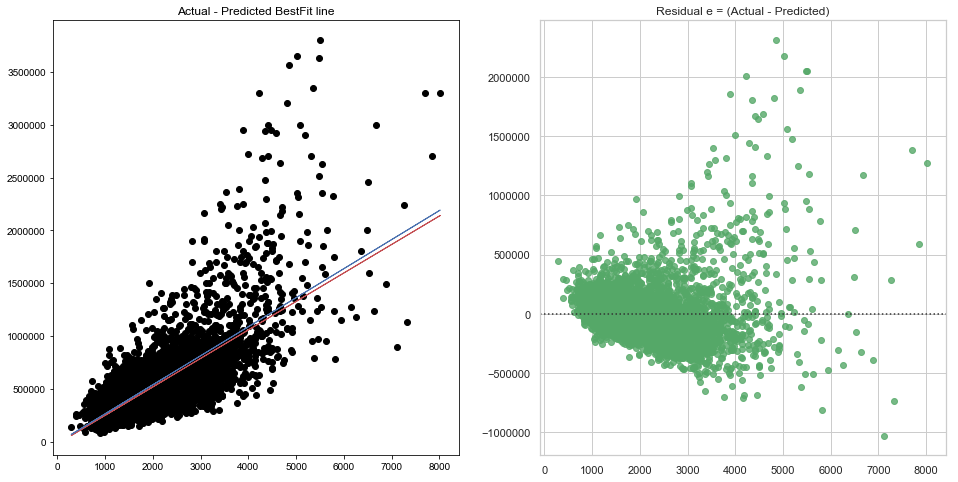

In [52]:
import seaborn as sns

fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Actual - Predicted BestFit line')
plt.plot(Xtest[:,0],Ttest,'o',color='black')

##ACTUAL
[x,y,b,m] = bestfit(Xtest,Ttest)
plt.plot(x, b + m * x, '-',lw=1,color='r')

##PREDICTED
[xp,yp,bp,mp] = bestfit(Xtest,predicted_lr)
plt.plot(xp, bp + mp * xp, '-',lw=1,color='b')

sns.set(style="whitegrid")
plt.subplot(1,2,2)
plt.title('Residual e = (Actual - Predicted)')
residual=(Ttest - predicted_lr)
sns.residplot(np.array(Xtest[:,0]), np.array(residual), color="g")

## Analysis of LS and LMS 

# YET TO BE WRITTEN

# Conclusions

Thus we have successfully implemented
1. Least Square
2. Batch Gradient Descent (LMS)
3. Stochastic Gradient Descent (LMS)

Further we have analysed our dataset and have trained all the above three models on the dataset and seen how each one of them perform.

Also, We have tried to understand what bestfit line is and how to find them in a LR model and also plotted residual graph after prediction.

# References

[1]. Ng, Andrew. "CS229 Lecture notes." CS229 Lecture notes 1.1 (2000): 1-3.

[2]. Duda, Richard O., Peter E. Hart, and David G. Stork. Pattern classification. John Wiley & Sons, 2012.

[3]. Géron, Aurélien. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.", 2017.

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. Try to answer to the following questions:

what is the most and least significant features for your data.
what are the consequences if you remove those features from the model? (Show your work!)
produce residual plots and observe the patterns for the goodness of fit
Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one.

### Most significant Feature
1. The most signicificant feature for our data is the SqFt living and removing that feature may have an affect on the output BestFit. 

In [100]:
Xmsf = data[['bedrooms','grade','zipcodeC']]
Ymsf = data[['price']] # this is the target label in this prices of the house.

Xlst,Tlst = partition(Xmsf,Ymsf)

Xtrain, Xtest = [xx.values for xx in Xlst]
Ttrain, Ttest = [tt.values for tt in Tlst]

print('The size of the Training dataset is {}'.format(Xtrain.shape))
print('The size of the Testing dataset is {}'.format(Xtest.shape))

[Xnorm,mu,sigma] = normalize_features(Xtrain)
# We will need the value of mu and sigma for normailzing the features for our test.
print('The value of the mean(mu) is \n{}'.format(mu))
print('The value of the StdDev(sigma) is \n{}'.format(sigma))


lms_msf = LMS(0.01)
lms_msf.train(Xnorm,Ttrain)

Xtest_normalize = np.transpose(np.asarray([(Xtest[:,0]-mu[0])/sigma[0],
                                           (Xtest[:,1]-mu[1])/sigma[1],
                                           (Xtest[:,2]-mu[2])/sigma[2]]))

predicted_msf = lms_msf.use(Xtest_normalize)


The size of the Training dataset is (17290, 3)
The size of the Testing dataset is (4323, 3)
The value of the mean(mu) is 
[ 3.36674378  7.59491035 31.81359167]
The value of the StdDev(sigma) is 
[ 0.93593134  1.16926992 19.39289998]
cost function = 22640679688.5638, rmse = 212794.17138899176
cost function = 129159879031.09294, rmse = 508251.6680367964
cost function = 8955730626.953638, rmse = 133833.70746529917
cost function = 152231275498.1046, rmse = 551781.2528495411
cost function = 101101696674.4727, rmse = 449670.31628621585
cost function = 547970912787.7602, rmse = 1046872.4017641884
cost function = 15379053224.225832, rmse = 175379.8918019157
cost function = 21166295715.913704, rmse = 205748.85523819423
cost function = 10048686233.947992, rmse = 141765.20189346885
cost function = 26757621175.26266, rmse = 231333.61699183568
cost function = 145543778532.36285, rmse = 539525.3071587335
cost function = 62302590970.55497, rmse = 352994.5919431485
cost function = 13443129845.906824, 

cost function = 458005872.70901144, rmse = 30265.685939988587
cost function = 11938542823.025372, rmse = 154522.12024836685
cost function = 13023059821.359724, rmse = 161388.1025438971
cost function = 730654556.146019, rmse = 38227.073028052226
cost function = 82728206201.35207, rmse = 406763.33709259506
cost function = 30713060.098908544, rmse = 7837.481751035666
cost function = 1542628127.1320043, rmse = 55545.083079098986
cost function = 416213032.5786949, rmse = 28851.794834245404
cost function = 2793426012.059253, rmse = 74745.24750188808
cost function = 12889735480.405567, rmse = 160559.86721721943
cost function = 993847839.094599, rmse = 44583.58081389603
cost function = 1484335182.0895731, rmse = 54485.50600094622
cost function = 27406552267.458675, rmse = 234121.9864406531
cost function = 3968219913.289575, rmse = 89086.69837062742
cost function = 2778818190.567603, rmse = 74549.55654553021
cost function = 2674218.98786661, rmse = 2312.669015603664
cost function = 32474381671.

cost function = 845381073.6099409, rmse = 41118.87823396793
cost function = 232991868671.5205, rmse = 682630.0149737345
cost function = 6942378123.810325, rmse = 117833.59558131394
cost function = 12377630930.116522, rmse = 157338.04962637945
cost function = 15133099242.921566, rmse = 173971.8324495179
cost function = 5982345.901864398, rmse = 3459.001561683486
cost function = 588999613.6476175, rmse = 34321.99334676287
cost function = 39294495589.83997, rmse = 280337.2811091667
cost function = 8120141405.37565, rmse = 127437.36818826455
cost function = 484005.16320501186, rmse = 983.8751579392701
cost function = 32449399979.158512, rmse = 254752.42875842622
cost function = 317269184.2837635, rmse = 25190.045029088913
cost function = 6966397860.5820675, rmse = 118037.26412097213
cost function = 5741265779.259081, rmse = 107156.57496634615
cost function = 33999239635.767, rmse = 260765.180328076
cost function = 2745786048.4001403, rmse = 74105.14217515732
cost function = 249135276.67707

cost function = 1057343125.9875091, rmse = 45985.71791301097
cost function = 5309718074.04215, rmse = 103050.64846028044
cost function = 50037591107.02548, rmse = 316346.61720026494
cost function = 5066540936.196704, rmse = 100663.21012362663
cost function = 5404684309.346523, rmse = 103968.11347087647
cost function = 37489837853.79795, rmse = 273824.1693269531
cost function = 10964327500.518686, rmse = 148083.27049683017
cost function = 17334946.749694355, rmse = 5888.114596319327
cost function = 17528583378.539463, rmse = 187235.59158738737
cost function = 175175204.10623416, rmse = 18717.64964445238
cost function = 149650883346.99442, rmse = 547084.7893096543
cost function = 23328955880.73104, rmse = 216004.42532842257
cost function = 28422154462.50754, rmse = 238420.44569418766
cost function = 77218352964.28004, rmse = 392984.3583764627
cost function = 165499404.3684027, rmse = 18193.372659757326
cost function = 23949556571.24021, rmse = 218858.66019529686
cost function = 708400795

cost function = 29283641632.563145, rmse = 242006.78351055842
cost function = 7257125459.458217, rmse = 120475.10497574357
cost function = 5145024796.17388, rmse = 101439.88166568294
cost function = 22634665367.142975, rmse = 212765.90594897
cost function = 585243407.6500388, rmse = 34212.37810062431
cost function = 1001949259929.161, rmse = 1415591.2262578919
cost function = 12441548.386576956, rmse = 4988.295978904411
cost function = 3546445150.5209084, rmse = 84219.29886339483
cost function = 9209866573.396406, rmse = 135719.3175152042
cost function = 28800839573.66456, rmse = 240003.49819810776
cost function = 62255060.29304617, rmse = 11158.4103073015
cost function = 20429019006.4043, rmse = 202133.71320195106
cost function = 81205727.13396196, rmse = 12744.07526138809
cost function = 47502187536.69888, rmse = 308227.7973729783
cost function = 411598753.29022396, rmse = 28691.418692362495
cost function = 384515503.1218319, rmse = 27731.408298960654
cost function = 4830976809.36505

cost function = 649781901.3996453, rmse = 36049.46328032209
cost function = 2353456469.127798, rmse = 68606.9452625286
cost function = 15382896227.390604, rmse = 175401.8028834972
cost function = 20492467193.212387, rmse = 202447.3620139931
cost function = 16131649967.088572, rmse = 179619.87622247473
cost function = 8455433904.667131, rmse = 130041.792548912
cost function = 225926578.7266142, rmse = 21256.8378987381
cost function = 1232716243.9790196, rmse = 49653.12163356942
cost function = 18565320681.536465, rmse = 192693.1274412062
cost function = 335386549.1868227, rmse = 25899.287603593373
cost function = 871529479.1313425, rmse = 41749.95758396271
cost function = 10164417892.956873, rmse = 142579.2263477178
cost function = 21359210914.54293, rmse = 206684.35313077248
cost function = 2147569196.4677987, rmse = 65537.30535302468
cost function = 3029165879.03508, rmse = 77835.28607302834
cost function = 4707814991.171274, rmse = 97034.16914851463
cost function = 2945577500.2410975

cost function = 10894659021.495733, rmse = 147612.05249908107
cost function = 96250288496.53514, rmse = 438748.8769137424
cost function = 70084391790.98624, rmse = 374391.21728744183
cost function = 5466391162.270864, rmse = 104559.94608138304
cost function = 917702678.2143959, rmse = 42841.63111307495
cost function = 15473351060.277752, rmse = 175916.74769775476
cost function = 3201074318.3333144, rmse = 80013.42785224633
cost function = 1610652710.766635, rmse = 56756.54518672952
cost function = 52737492443.24064, rmse = 324769.1255130039
cost function = 206776412013.00266, rmse = 643080.7290115334
cost function = 7105.6661251384785, rmse = 119.21129246123019
cost function = 8818860523.459215, rmse = 132807.0820661249
cost function = 3069184669.7684307, rmse = 78347.74623138091
cost function = 10135135198.139002, rmse = 142373.69980539946
cost function = 13022049887.332935, rmse = 161381.84462530434
cost function = 3967410976.431583, rmse = 89077.61757514154
cost function = 361700263

cost function = 3047310378.7671785, rmse = 78068.05209260929
cost function = 46715491174.78987, rmse = 305664.82026818156
cost function = 66008641355.03443, rmse = 363341.8262601608
cost function = 7395468759.508426, rmse = 121617.99833501969
cost function = 4873088208.42088, rmse = 98722.72492613725
cost function = 2999844602.6027904, rmse = 77457.66072639672
cost function = 47354417.48749943, rmse = 9731.846431946964
cost function = 3114164386.991183, rmse = 78919.76161888964
cost function = 13932079418.696495, rmse = 166925.60869259393
cost function = 1404831572.4397848, rmse = 53006.25571458117
cost function = 33547758503.393776, rmse = 259028.02359356324
cost function = 1596423932.4156265, rmse = 56505.29059151234
cost function = 6025590108.393471, rmse = 109777.86760903557
cost function = 63000843983.812454, rmse = 354967.1646330473
cost function = 29604971985.484062, rmse = 243330.9350883445
cost function = 38552736937.900406, rmse = 277678.72420443164
cost function = 574648668.

cost function = 4501825348.874667, rmse = 94887.56872082525
cost function = 1067936568.9795115, rmse = 46215.50754843035
cost function = 2848525256.9142323, rmse = 75478.80837578495
cost function = 183745756942.81995, rmse = 606210.7833795436
cost function = 2459595686.6035333, rmse = 70136.94727607601
cost function = 1900378604.6925926, rmse = 61650.28150288679
cost function = 8653939723.082472, rmse = 131559.41412975715
cost function = 5263106051.7123995, rmse = 102597.32990397362
cost function = 16733251991.43622, rmse = 182938.5251467619
cost function = 25767055111.31423, rmse = 227011.25571792352
cost function = 510946144.53757274, rmse = 31967.050052751903
cost function = 37153397923.26767, rmse = 272592.7288952061
cost function = 61584992.584745266, rmse = 11098.197383786726
cost function = 62006564964.13304, rmse = 352154.97998504306
cost function = 7938054.469531477, rmse = 3984.4835222476395
cost function = 16391953470.806103, rmse = 181063.26778673858
cost function = 1682407

cost function = 99155385335.63991, rmse = 445320.9748835999
cost function = 15102712427.475008, rmse = 173797.07953515794
cost function = 8294299919.231542, rmse = 128796.73846205533
cost function = 18193339682.757706, rmse = 190752.92754114
cost function = 20248169376.879044, rmse = 201237.02132996824
cost function = 15763458684.198772, rmse = 177558.20839487412
cost function = 27330230815.8674, rmse = 233795.7690629469
cost function = 546411178.0625511, rmse = 33057.86375622451
cost function = 8767130637.628159, rmse = 132416.9976825344
cost function = 20075337.181255393, rmse = 6336.455978108803
cost function = 749547180.8685217, rmse = 38718.13995709302
cost function = 3805121396.8032084, rmse = 87236.70554076659
cost function = 16753936552.065939, rmse = 183051.55859519984
cost function = 6722608609.691836, rmse = 115953.51318258396
cost function = 91536974517.87796, rmse = 427871.41647433746
cost function = 1687630.186709141, rmse = 1837.1881703892723
cost function = 21784178350.

cost function = 24810955386.758957, rmse = 222759.7602205522
cost function = 17462833802.39597, rmse = 186884.10206540293
cost function = 9103790063.35881, rmse = 134935.46652647562
cost function = 2726996864.366508, rmse = 73851.15929173364
cost function = 1693739223.208796, rmse = 58202.048472692026
cost function = 4460632753.760372, rmse = 94452.45104030252
cost function = 14751028658.642557, rmse = 171761.62935092667
cost function = 24982203960.739643, rmse = 223527.19727469247
cost function = 21740815209.39004, rmse = 208522.4937957056
cost function = 27683425547.777416, rmse = 235301.61728206382
cost function = 26045365779.937492, rmse = 228233.94042051455
cost function = 1780067236.597756, rmse = 59666.862438002485
cost function = 659391009.2583556, rmse = 36315.038462277735
cost function = 12205818754.32534, rmse = 156242.23983497766
cost function = 1061829914.89501, rmse = 46083.18380700296
cost function = 3394040360.3357253, rmse = 82389.80956812226
cost function = 8617168833

cost function = 43508254166.86705, rmse = 294985.6069941957
cost function = 4039403644.346449, rmse = 89882.18560255918
cost function = 595588971.16, rmse = 34513.44581927455
cost function = 45723243846.63408, rmse = 302401.2031941476
cost function = 5716776406.617911, rmse = 106927.79252016672
cost function = 18127767955.551365, rmse = 190408.86510638817
cost function = 7331390280.362274, rmse = 121089.9688691204
cost function = 669014091.5942576, rmse = 36579.06755493523
cost function = 1329571420.1256402, rmse = 51566.877356024575
cost function = 16252416835.478697, rmse = 180290.96946590918
cost function = 8120501635.4843025, rmse = 127440.19487967133
cost function = 88266160638.89645, rmse = 420157.4958010304
cost function = 2599470613.4729176, rmse = 72103.68386529107
cost function = 8940692863.721695, rmse = 133721.29870534234
cost function = 6930580895.66451, rmse = 117733.43531609455
cost function = 23480856171.221546, rmse = 216706.51199823944
cost function = 78940721498.6830

cost function = 41070156909.22671, rmse = 286601.31510244927
cost function = 9113949604.929443, rmse = 135010.73738728667
cost function = 18698934390.516212, rmse = 193385.28584417282
cost function = 137952494.67338315, rmse = 16610.38799507002
cost function = 1974601034.1582344, rmse = 62842.6771256323
cost function = 1564031008.7723844, rmse = 55929.080249408435
cost function = 22121830266.64715, rmse = 210341.7707762638
cost function = 22474385437.301205, rmse = 212011.25176415144
cost function = 28366893647.18511, rmse = 238188.55407926347
cost function = 445175283.0311807, rmse = 29838.742702439078
cost function = 1170454183.529031, rmse = 48382.934667691065
cost function = 42547691.63039661, rmse = 9224.715890518972
cost function = 1554136253.6559422, rmse = 55751.88344183436
cost function = 14245634882.09243, rmse = 168793.5714539652
cost function = 281116678.6534919, rmse = 23711.460463391617
cost function = 8359967622.580137, rmse = 129305.5886076092
cost function = 372709036.

cost function = 21680919709.19598, rmse = 208235.05809155182
cost function = 137668725.4906382, rmse = 16593.29536232259
cost function = 91130228051.84354, rmse = 426919.73028156837
cost function = 3960913718.76591, rmse = 89004.64840406831
cost function = 5849548648.395476, rmse = 108162.36543637048
cost function = 7203797637.545926, rmse = 120031.64280760242
cost function = 18583596841.125797, rmse = 192787.95004421723
cost function = 6736839334.174972, rmse = 116076.17614459025
cost function = 8470359982.51766, rmse = 130156.52102386311
cost function = 13780649845.650085, rmse = 166015.96215816168
cost function = 54843684128.201515, rmse = 331190.8335935689
cost function = 44869509278.712456, rmse = 299564.7151408605
cost function = 2496070575.7073727, rmse = 70655.08581421967
cost function = 6010149507.181705, rmse = 109637.12425252411
cost function = 14631411821.580194, rmse = 171063.7999202648
cost function = 76657344558.43373, rmse = 391554.1969087644
cost function = 102310808.2

cost function = 1140347648.0118525, rmse = 47756.62567669229
cost function = 19227500256.230392, rmse = 196099.46586480236
cost function = 1850709742.0353184, rmse = 60839.29227128334
cost function = 58627995150.402534, rmse = 342426.62031565985
cost function = 5539361133.601497, rmse = 105255.50943871296
cost function = 44471892216.909546, rmse = 298234.44541806215
cost function = 25846966706.31012, rmse = 227362.9992162758
cost function = 8856194237.437866, rmse = 133087.89755224076
cost function = 33623845234.663624, rmse = 259321.5966118658
cost function = 12483993656.066193, rmse = 158012.6175725609
cost function = 42386221517.12835, rmse = 291157.07622219436
cost function = 15277114660.113834, rmse = 174797.6811065515
cost function = 5577181146.620891, rmse = 105614.21444692841
cost function = 19655169172.048687, rmse = 198268.34932509367
cost function = 74133491720.99939, rmse = 385054.52009033575
cost function = 1525889114.7709234, rmse = 55242.90207385784
cost function = 14104

cost function = 8220535091.466441, rmse = 128222.73660678469
cost function = 3765823790.975856, rmse = 86785.06543151138
cost function = 11076592056.670572, rmse = 148839.45751493837
cost function = 73804921180.64441, rmse = 384200.2633540076
cost function = 21005740658.60797, rmse = 204967.02495088312
cost function = 6598271370.796282, rmse = 114876.20615946787
cost function = 921941577.1468242, rmse = 42940.46057384164
cost function = 16862640.125025637, rmse = 5807.347092266078
cost function = 12707701576.729094, rmse = 159422.0911713875
cost function = 1496221313.5914106, rmse = 54703.223188243865
cost function = 950782462.7985464, rmse = 43606.93666834547
cost function = 9809655415.694653, rmse = 140068.95027588843
cost function = 44166525722.516014, rmse = 297208.7674430753
cost function = 35594102442.111015, rmse = 266811.17833445815
cost function = 8836572649.627766, rmse = 132940.3825000347
cost function = 8407593002.033925, rmse = 129673.38201831497
cost function = 4717024902

cost function = 39457146858.41093, rmse = 280916.8804412114
cost function = 213116263.57340196, rmse = 20645.399660621828
cost function = 257316470.09129515, rmse = 22685.52270022867
cost function = 13403176499.774395, rmse = 163726.45784829278
cost function = 9139844152.068619, rmse = 135202.39755321367
cost function = 19153272818.36814, rmse = 195720.58051399776
cost function = 4545972875.78006, rmse = 95351.69506390602
cost function = 15257997698.068237, rmse = 174688.28064909356
cost function = 22663718136.505966, rmse = 212902.41020949464
cost function = 1764491286.5615597, rmse = 59405.2402833548
cost function = 53562581360.51577, rmse = 327299.8055621658
cost function = 58815513809.908165, rmse = 342973.800194441
cost function = 45290746904.233925, rmse = 300967.59594426083
cost function = 5440486019.824597, rmse = 104311.89788154175
cost function = 4460059962.350418, rmse = 94446.38650949456
cost function = 310269002.0796893, rmse = 24910.600236834493
cost function = 6901777723

cost function = 24918101946.652203, rmse = 223240.23806944932
cost function = 3253489120.5650587, rmse = 80665.84308820008
cost function = 2697382301.945728, rmse = 73449.06128665945
cost function = 381179748.479242, rmse = 27610.858316221973
cost function = 10292095463.530725, rmse = 143471.91685853177
cost function = 5677567517.887963, rmse = 106560.47595509287
cost function = 842619778.2963371, rmse = 41051.66935208207
cost function = 18976837220.327736, rmse = 194817.0281075437
cost function = 5740819297.600469, rmse = 107152.40825665533
cost function = 59748147126.03004, rmse = 345682.3603426418
cost function = 2392274972.370434, rmse = 69170.44126461004
cost function = 30180312827.60151, rmse = 245683.99552108196
cost function = 266669307.02295545, rmse = 23094.12509808308
cost function = 21438588365.85771, rmse = 207068.04855340533
cost function = 3174981604.4140763, rmse = 79686.65640386823
cost function = 3689844714.469873, rmse = 85905.11875866156
cost function = 18828555656.

cost function = 1402269692.406074, rmse = 52957.90200538677
cost function = 36132139883.47419, rmse = 268820.16250078485
cost function = 14881934.060485892, rmse = 5455.627197763039
cost function = 238572105.4276102, rmse = 21843.630899079493
cost function = 1482808458.5669627, rmse = 54457.47806439374
cost function = 14613592074.795347, rmse = 170959.59800371167
cost function = 10078791246.345705, rmse = 141977.40134504298
cost function = 49409252.26696082, rmse = 9940.749696774466
cost function = 423689559882.13824, rmse = 920531.9765028679
cost function = 5098040125.735862, rmse = 100975.64187204617
cost function = 1310055127.5223737, rmse = 51187.01256221882
cost function = 29918243374.34247, rmse = 244614.9765420853
cost function = 6446001380.749654, rmse = 113542.95557849156
cost function = 3892872323.6495852, rmse = 88236.86671283818
cost function = 58868404814.55349, rmse = 343127.97849943244
cost function = 4782583137.197053, rmse = 97801.66805527452
cost function = 1099880981

### Plotting (Actual - Predicted) and residual plot w/o having the MSF in the dataset.

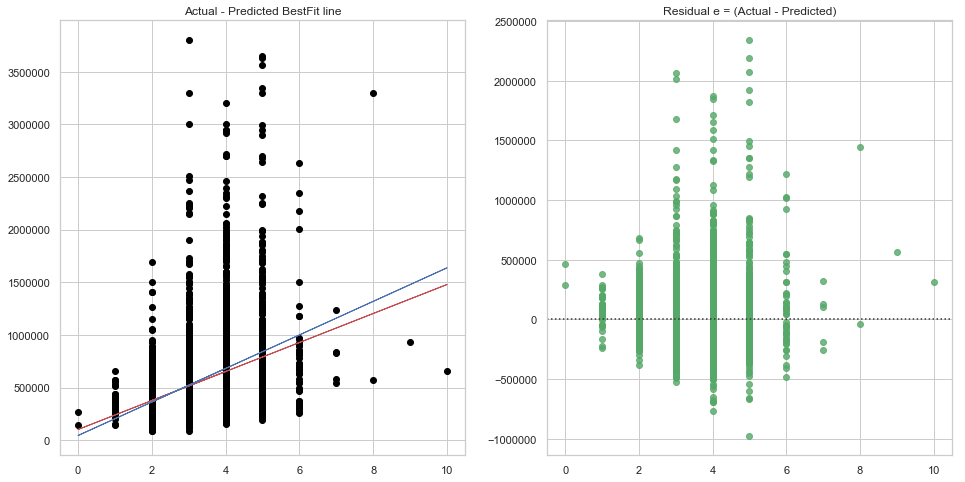

In [99]:
fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Actual - Predicted BestFit line')
plt.plot(Xtest[:,0],Ttest,'o',color='black')

##ACTUAL
[x,y,b,m] = bestfit(Xtest,Ttest)
plt.plot(x, b + m * x, '-',lw=1,color='r')

##PREDICTED
[xp,yp,bp,mp] = bestfit(Xtest,predicted_sgd)
plt.plot(xp, bp + mp * xp, '-',lw=1,color='b')

sns.set(style="whitegrid")
plt.subplot(1,2,2)
plt.title('Residual e = (Actual - Predicted)')
residual=(Ttest - predicted_sgd)
sns.residplot(np.array(Xtest[:,0]), np.array(residual), color="g")

### Analysis 

When we drop the most significant feature in this case the SqFt living from the dataset the model trained is not a very good one.
1. The actual - predicted Best fit line actually shows that there is a greater deviation in the result 
2. Since SqFT living was not a categorical data it is pretty clear that it will have an impact on the results as linear regression models most likely to do well if there is continous data in oppose to discrete data predictors.
3. The residual plot <b>$e = (actual - predicted)$</b>  also seem to not yield good reuslts as there are more data points that now deviate from zero. 
4. The cost function and rmse values always din't converge. 

### Least Significant Feature
The least significant feature in our dataset actually will turn out to be pincode. SqFt,grade,bedrooms actually have a very high co-relation with one and another. Pincode though gives some insight about popular places in king county it does not have much effect because of
- The population space does not actually have a lot of data to add more weightage to this feature
- Variance is high wrt the pincode feature

In [101]:
Xlsf = data[['sqft_living','bedrooms','grade']]
Ylsf = data[['price']] # this is the target label in this prices of the house.

Xlst,Tlst = partition(Xlsf,Ylsf)

Xtrain, Xtest = [xx.values for xx in Xlst]
Ttrain, Ttest = [tt.values for tt in Tlst]

print('The size of the Training dataset is {}'.format(Xtrain.shape))
print('The size of the Testing dataset is {}'.format(Xtest.shape))

[Xnorm,mu,sigma] = normalize_features(Xtrain)
# We will need the value of mu and sigma for normailzing the features for our test.
print('The value of the mean(mu) is \n{}'.format(mu))
print('The value of the StdDev(sigma) is \n{}'.format(sigma))


lms_lsf = LMS(0.01)
lms_lsf.train(Xnorm,Ttrain)

Xtest_normalize = np.transpose(np.asarray([(Xtest[:,0]-mu[0])/sigma[0],
                                           (Xtest[:,1]-mu[1])/sigma[1],
                                           (Xtest[:,2]-mu[2])/sigma[2]]))

predicted_msf = lms_lsf.use(Xtest_normalize)

The size of the Training dataset is (17290, 3)
The size of the Testing dataset is (4323, 3)
The value of the mean(mu) is 
[2054.03545402    3.36674378    7.59491035]
The value of the StdDev(sigma) is 
[904.10992921   0.93593134   1.16926992]
cost function = 23477718285.30148, rmse = 216692.031626922
cost function = 138744546709.95175, rmse = 526772.3354732132
cost function = 11645778148.411068, rmse = 152615.71444914228
cost function = 171042498240.4692, rmse = 584880.3266318148
cost function = 119778690141.20834, rmse = 489445.99322337564
cost function = 449203631783.4174, rmse = 947843.4805213542
cost function = 32113363031.829433, rmse = 253429.92337855225
cost function = 47845568943.39177, rmse = 309339.8420617421
cost function = 22824364537.72119, rmse = 213655.6319768856
cost function = 44481678959.6863, rmse = 298267.25921457185
cost function = 139435985003.35016, rmse = 528083.2983599276
cost function = 103197038427.02245, rmse = 454306.14881822246
cost function = 41282518818.2

cost function = 3002226588.0821643, rmse = 77488.40672103362
cost function = 5265218837.630225, rmse = 102617.92082896852
cost function = 2223572066.5599694, rmse = 66686.91125790682
cost function = 62566940604.20327, rmse = 353742.6765438495
cost function = 8734649366.013897, rmse = 132171.4747289588
cost function = 23405486294.26689, rmse = 216358.43544575234
cost function = 2563145759.749291, rmse = 71598.12511161575
cost function = 18089532442.94202, rmse = 190207.95168941817
cost function = 301994976.28024846, rmse = 24576.20704178122
cost function = 41972744.926750444, rmse = 9162.17713502096
cost function = 811584405.2579982, rmse = 40288.56922895124
cost function = 3176914780.9480257, rmse = 79710.91243923915
cost function = 64673889573.31514, rmse = 359649.52265591884
cost function = 19424302093.876614, rmse = 197100.49261164526
cost function = 50738532495.97844, rmse = 318554.6499298933
cost function = 1767490527.1431634, rmse = 59455.70665870793
cost function = 27347060285.9

cost function = 91452225340.0277, rmse = 427673.2990029368
cost function = 2593723689.6371703, rmse = 72023.93615510291
cost function = 4442545523.077859, rmse = 94260.76090375951
cost function = 4091304860.990202, rmse = 90457.77867038525
cost function = 42548318686.60928, rmse = 291713.27939128614
cost function = 2953114489.0766015, rmse = 76851.9939764298
cost function = 2483697619.248418, rmse = 70479.75055643171
cost function = 775625953.5044512, rmse = 39385.93539588596
cost function = 445166771.5167134, rmse = 29838.457450636197
cost function = 19841812392.292385, rmse = 199207.4917882979
cost function = 612677250.2062374, rmse = 35005.06392527337
cost function = 519789080.1224393, rmse = 32242.48998208542
cost function = 1210803686.5781002, rmse = 49209.83004599996
cost function = 3234246491.4005723, rmse = 80426.94189636421
cost function = 40643770739.430855, rmse = 285109.700780001
cost function = 3220643822.723136, rmse = 80257.63294195931
cost function = 42337189943.66844, 

cost function = 16637633779.04392, rmse = 182415.096848062
cost function = 10638525169.155817, rmse = 145866.5497580293
cost function = 4984399608.128585, rmse = 99843.87420496647
cost function = 5450298386.187638, rmse = 104405.92307132424
cost function = 9720135153.883715, rmse = 139428.3698096174
cost function = 3200328835.7132034, rmse = 80004.1103408219
cost function = 56826070618.654106, rmse = 337123.3323834294
cost function = 2734063858.490185, rmse = 73946.78976791602
cost function = 47020323018.78084, rmse = 306660.47354943166
cost function = 3423096406.906762, rmse = 82741.72353663854
cost function = 855528459.3741249, rmse = 41364.92377302598
cost function = 95543425.0018155, rmse = 13823.416726830998
cost function = 2054920377.7151194, rmse = 64108.039709776174
cost function = 140074248.3788628, rmse = 16737.63713185722
cost function = 11639874685.890093, rmse = 152577.0276672743
cost function = 1349577418.5812888, rmse = 51953.39100734983
cost function = 5461981252.647142

cost function = 1125233338.745932, rmse = 47439.08386016602
cost function = 2216028760.8240075, rmse = 66573.69992457994
cost function = 178552035.1537225, rmse = 18897.19741939119
cost function = 10269553262.08093, rmse = 143314.71147150896
cost function = 17379725449.81358, rmse = 186438.86638688607
cost function = 3353553994.2298455, rmse = 81896.93515913578
cost function = 18281523.412254084, rmse = 6046.738527876674
cost function = 13007008364.211521, rmse = 161288.61313937523
cost function = 1286346534.8920033, rmse = 50721.72187321726
cost function = 3465429075.058642, rmse = 83251.77565744339
cost function = 3583748625.568543, rmse = 84661.0728206127
cost function = 6651845774.357853, rmse = 115341.62972975415
cost function = 51256751344.75132, rmse = 320177.2988353525
cost function = 998720223.9582393, rmse = 44692.73372614925
cost function = 5026186961.226947, rmse = 100261.52762876643
cost function = 2320549830.022689, rmse = 68125.6167681833
cost function = 1340349555.05291

cost function = 9714219816.87263, rmse = 139385.9377187859
cost function = 9988387948.690952, rmse = 141339.2227846959
cost function = 13630910146.475458, rmse = 165111.53894549864
cost function = 46938198629.670364, rmse = 306392.55418391083
cost function = 18053786960.424976, rmse = 190019.93032534758
cost function = 1304185698.5567155, rmse = 51072.21746814437
cost function = 210747491210.25684, rmse = 649226.4492613603
cost function = 8583300870.773377, rmse = 131021.37894842488
cost function = 274379522566.20428, rmse = 740782.7246449586
cost function = 8519909980.31866, rmse = 130536.66136621282
cost function = 22157024.077681553, rmse = 6656.879761221702
cost function = 51800944169.54558, rmse = 321872.47216730285
cost function = 373668339688.0839, rmse = 864486.3673743894
cost function = 110600275681.27867, rmse = 470319.6268098508
cost function = 22626826645.30816, rmse = 212729.0607571432
cost function = 259679833036.12704, rmse = 720666.1266302546
cost function = 47296758634

cost function = 269931525.47037494, rmse = 23234.95321580721
cost function = 23605522597.872597, rmse = 217281.02815419756
cost function = 101506.58336627741, rmse = 450.5698244806845
cost function = 522578508.7677124, rmse = 32328.88828177401
cost function = 242137.62978927317, rmse = 695.8988860305399
cost function = 4843940919.934342, rmse = 98427.03815450653
cost function = 9548847020.234606, rmse = 138194.40669024637
cost function = 76406833.80215527, rmse = 12361.782541539491
cost function = 22674289274.24824, rmse = 212952.0569247841
cost function = 17689359139.079113, rmse = 188092.31318200706
cost function = 8069574876.702489, rmse = 127039.95337453875
cost function = 56971528282.12278, rmse = 337554.52383910597
cost function = 494474260.0990244, rmse = 31447.551895148354
cost function = 335173166.3296426, rmse = 25891.04734573874
cost function = 51442858.753845625, rmse = 10143.259708185098
cost function = 462329900.78483784, rmse = 30408.21930941823
cost function = 352622815

cost function = 34470638231.88978, rmse = 262566.7085976049
cost function = 2447197764.3353224, rmse = 69959.95660855318
cost function = 7487839149.602679, rmse = 122375.15392924071
cost function = 16392314669.71161, rmse = 181065.26265251217
cost function = 11640721062.590525, rmse = 152582.57477569662
cost function = 321641013.96388423, rmse = 25363.0051044384
cost function = 146315229.55564952, rmse = 17106.444958298584
cost function = 610415248.0977141, rmse = 34940.38488905679
cost function = 14728780354.733913, rmse = 171632.05035618442
cost function = 2342658721.9722733, rmse = 68449.37869655609
cost function = 456544067.77409303, rmse = 30217.348254739132
cost function = 121952402083.25444, rmse = 493867.1928428825
cost function = 5064280804.310046, rmse = 100640.75520692446
cost function = 11502555661.418745, rmse = 151674.3594772613
cost function = 109085240.11966012, rmse = 14770.595121365972
cost function = 45449750056.57918, rmse = 301495.43962248974
cost function = 224352

cost function = 642350381.8616763, rmse = 35842.72260478203
cost function = 14510189858.458937, rmse = 170353.69005958713
cost function = 977403977.551173, rmse = 44213.21018770686
cost function = 83450908.1246117, rmse = 12919.048581425159
cost function = 13057084500.377766, rmse = 161598.79022058158
cost function = 2050833831.6162395, rmse = 64044.26331243478
cost function = 49652726.74921321, rmse = 9965.212165248988
cost function = 1730859215.3045955, rmse = 58836.369964582205
cost function = 3415112974.7604623, rmse = 82645.1810423386
cost function = 1916908802.1847465, rmse = 61917.829454604536
cost function = 34145208.69024547, rmse = 8263.80163003027
cost function = 4083462830.473656, rmse = 90371.04437233927
cost function = 21201434.77766238, rmse = 6511.74857893982
cost function = 547944342.2164669, rmse = 33104.209466968605
cost function = 27730260.80451489, rmse = 7447.18212541024
cost function = 2209071947.025899, rmse = 66469.11985314533
cost function = 6064634554.968966,

cost function = 1493405173.895413, rmse = 54651.718616991595
cost function = 34747948573.13733, rmse = 263620.7449088077
cost function = 2629310863.547659, rmse = 72516.35489388113
cost function = 289714127.1254108, rmse = 24071.316005794564
cost function = 10974127687.561483, rmse = 148149.4359595168
cost function = 24481050766.04034, rmse = 221273.81573986716
cost function = 24934437841.96121, rmse = 223313.40238311363
cost function = 10567708387.5176, rmse = 145380.24891654024
cost function = 9849404061.732885, rmse = 140352.44252760895
cost function = 28724765093.382324, rmse = 239686.3162276158
cost function = 4548267177.159798, rmse = 95375.75349280128
cost function = 32832527009.2126, rmse = 256251.9346627947
cost function = 37982161969.104416, rmse = 275616.26210767904
cost function = 20793683141.074883, rmse = 203929.8072429574
cost function = 4488084947.372625, rmse = 94742.65087459423
cost function = 2861584.286938267, rmse = 2392.3144805557095
cost function = 6919793346.110

cost function = 189920133.8191313, rmse = 19489.491210348788
cost function = 355398631.1254026, rmse = 26660.78135109332
cost function = 17663661337.571217, rmse = 187955.64017911896
cost function = 22305358126.610794, rmse = 211212.49076042257
cost function = 77605981257.7109, rmse = 393969.4943969924
cost function = 10231330215.354668, rmse = 143047.75576956576
cost function = 1948824633.5602446, rmse = 62431.15622123692
cost function = 3716330827.3945637, rmse = 86212.885665596
cost function = 2561210912.896993, rmse = 71571.09630146786
cost function = 13081737704.209963, rmse = 161751.2763733873
cost function = 3372722999.9871054, rmse = 82130.66418807418
cost function = 7879638656.6122, rmse = 125535.96023938479
cost function = 30913867642.79236, rmse = 248651.8354760019
cost function = 1009130171.2518557, rmse = 44925.05250418425
cost function = 49195550230.81464, rmse = 313673.55716035306
cost function = 14920900709.828785, rmse = 172747.79714849498
cost function = 479879785.551

cost function = 34156428645.52854, rmse = 261367.284278383
cost function = 56441345.87537862, rmse = 10624.626664064825
cost function = 1194124975.8621964, rmse = 48869.72428533225
cost function = 6798039057.357909, rmse = 116602.22174005012
cost function = 266212907.4752953, rmse = 23074.35405272682
cost function = 375486450.761028, rmse = 27403.884788877214
cost function = 10943380322.494356, rmse = 147941.7474717286
cost function = 32067589856.900414, rmse = 253249.24425119383
cost function = 191984405342.29532, rmse = 619652.1691115029
cost function = 726931923.990179, rmse = 38129.56658526763
cost function = 64555096760.93592, rmse = 359319.0692433006
cost function = 275505663.8733758, rmse = 23473.630476488965
cost function = 3273184304.8169775, rmse = 80909.63236620196
cost function = 2870774550.872665, rmse = 75773.0103780055
cost function = 704655887.980567, rmse = 37540.80148266861
cost function = 1656403181.7059183, rmse = 57556.9836198166
cost function = 620255103.6284343, 

cost function = 972011222.8803213, rmse = 44091.069909457205
cost function = 3204414324.30865, rmse = 80055.16003742232
cost function = 7604765967.304139, rmse = 123326.93110026
cost function = 739467946.3113797, rmse = 38456.9355594379
cost function = 71730894778.46729, rmse = 378763.5008246367
cost function = 3674536430.9784255, rmse = 85726.73364801
cost function = 1835143911.760876, rmse = 60582.900421833154
cost function = 25072651910.55048, rmse = 223931.47126096627
cost function = 1083032508.7190995, rmse = 46541.00361442799
cost function = 516137.34369752725, rmse = 1016.0091965110623
cost function = 2091620495.2678273, rmse = 64677.97917789064
cost function = 19458744843.832676, rmse = 197275.16236887337
cost function = 5085966326.182201, rmse = 100855.99958537123
cost function = 22418115096.57656, rmse = 211745.67337528558
cost function = 4009623631.9701633, rmse = 89550.24993789982
cost function = 6134289658.803558, rmse = 110763.6191066684
cost function = 10806864.380542196

cost function = 12885414686.383945, rmse = 160532.95416445774
cost function = 6858090967.025503, rmse = 117116.1045033987
cost function = 80170519.5046797, rmse = 12662.584215291892
cost function = 3331705802.235057, rmse = 81629.72255539102
cost function = 12587289155.090868, rmse = 158664.98766325775
cost function = 1184864783.7677736, rmse = 48679.86819554411
cost function = 519423376.7040554, rmse = 32231.145704242517
cost function = 3887703284.7728047, rmse = 88178.26585698774
cost function = 5633359494.156248, rmse = 106144.8019844236
cost function = 197688013.1600867, rmse = 19884.064632769965
cost function = 55653636552.31139, rmse = 333627.4465697071
cost function = 578230420.1462617, rmse = 34006.77638783958
cost function = 45324903390.88253, rmse = 301081.0634725556
cost function = 1079028374.4963999, rmse = 46454.889398133324
cost function = 1474150531.3162146, rmse = 54298.260217362666
cost function = 17377515045.752987, rmse = 186427.01009109698
cost function = 1133937660

cost function = 10153448.062874505, rmse = 4506.317357416032
cost function = 17816675002.03931, rmse = 188767.97928695063
cost function = 29594436834.541042, rmse = 243287.6356683218
cost function = 983974302.2599207, rmse = 44361.566750057886
cost function = 400422928.53470534, rmse = 28299.220078818616
cost function = 2079467427.4421554, rmse = 64489.804270786175
cost function = 28261149519.38279, rmse = 237744.18823341525
cost function = 125191055181.0533, rmse = 500381.96446525387
cost function = 88654110136.66324, rmse = 421079.82648581784
cost function = 197972397808.64575, rmse = 629241.4446119164
cost function = 152396310742.9332, rmse = 552080.267249126
cost function = 8811304032.473778, rmse = 132750.17161927721
cost function = 16453482595.419521, rmse = 181402.77062613747
cost function = 17286928814.090866, rmse = 185940.46796806157
cost function = 8390461429.257443, rmse = 129541.20139366813
cost function = 1716630013.889832, rmse = 58594.02723639726
cost function = 6983359

cost function = 41378588.086828925, rmse = 9097.09712895591
cost function = 6361310454.895907, rmse = 112794.5961019047
cost function = 12250703940.237696, rmse = 156529.25566958846
cost function = 14296461192.25571, rmse = 169094.41854925733
cost function = 252182436782.37793, rmse = 710186.506183239
cost function = 2990731119.1812654, rmse = 77339.9136175011
cost function = 11296916167.622334, rmse = 150312.44903614826
cost function = 1916604276.4723623, rmse = 61912.91103594407
cost function = 14513782795.406067, rmse = 170374.77979681187
cost function = 24126867982.401226, rmse = 219667.33021731395
cost function = 49398306973.90966, rmse = 314319.28663036146
cost function = 82485553573.53746, rmse = 406166.3540312946
cost function = 33753326.333839916, rmse = 8216.243221063982
cost function = 27757348096.471, rmse = 235615.5686556854
cost function = 262158417.06508145, rmse = 22897.96572034649
cost function = 817956690.2862437, rmse = 40446.42605438072
cost function = 2638363914.29

cost function = 11212546132.128632, rmse = 149750.09937979095
cost function = 1663139085.530155, rmse = 57673.895057125366
cost function = 1355952039.081742, rmse = 52075.94529303798
cost function = 653881759.1074677, rmse = 36163.0131241153
cost function = 320991421.27607924, rmse = 25337.380341151264
cost function = 25553274322.784603, rmse = 226067.57539631642
cost function = 20223061964.26974, rmse = 201112.21725330234
cost function = 3545973754.2724366, rmse = 84213.7014300219
cost function = 24038115765.457413, rmse = 219262.92785355856
cost function = 13708400906.362787, rmse = 165580.19752592873
cost function = 835320104.8109889, rmse = 40873.46583814465
cost function = 40489294181.52542, rmse = 284567.3705171604
cost function = 2053695607.7199452, rmse = 64088.932082223764
cost function = 10835554476.889826, rmse = 147211.10336445295
cost function = 4034441263.0105014, rmse = 89826.95879312069
cost function = 45732856660.95463, rmse = 302432.98980420316
cost function = 4030354

cost function = 632558737.5629178, rmse = 35568.489919110085
cost function = 485557378145.66846, rmse = 985451.5494388026
cost function = 83071190.70673595, rmse = 12889.623012853088
cost function = 34750211.1596067, rmse = 8336.691329251276
cost function = 2473625082.285948, rmse = 70336.6914531235
cost function = 14470172437.866875, rmse = 170118.6200147819
cost function = 12159341386.876804, rmse = 155944.48619221395
cost function = 4410541269.638542, rmse = 93920.61828627985
cost function = 1136522321.7932591, rmse = 47676.457959736465
cost function = 14385202326.402905, rmse = 169618.40894432954
cost function = 7380729123.0314, rmse = 121496.74170965573
cost function = 263829059.40761533, rmse = 22970.810147124343
cost function = 8507332081.533357, rmse = 130440.27048065607
cost function = 1346218015.250217, rmse = 51888.688849309285
cost function = 41103505423.207436, rmse = 286717.6500434092
cost function = 11199315.08753692, rmse = 4732.71911009663
cost function = 72260298225.5

cost function = 33183151.45072057, rmse = 8146.551595702389
cost function = 2891249050.5052996, rmse = 76042.73864749086
cost function = 26750963811.226948, rmse = 231304.83700617653
cost function = 12317879474.077194, rmse = 156957.82538043265
cost function = 48008645277.12193, rmse = 309866.56895225705
cost function = 110799424.06065403, rmse = 14886.19656330347
cost function = 3590374341.0549192, rmse = 84739.29833382997
cost function = 588089.3846051452, rmse = 1084.5177588266088
cost function = 2533508535.6246886, rmse = 71182.9830173573
cost function = 7535776972.197398, rmse = 122766.25735272211
cost function = 9332014187.144855, rmse = 136616.35471015068
cost function = 2030423008.884195, rmse = 63724.76769489545
cost function = 18801373098.10558, rmse = 193914.27538015647
cost function = 935492487.7173563, rmse = 43254.883833328146
cost function = 40854563376.74097, rmse = 285848.0833475746
cost function = 1488794367.109838, rmse = 54567.28630067356
cost function = 723268690.0

### Plotting (Actual - Predicted) and residual plot w/o having the LSF in the dataset.# 

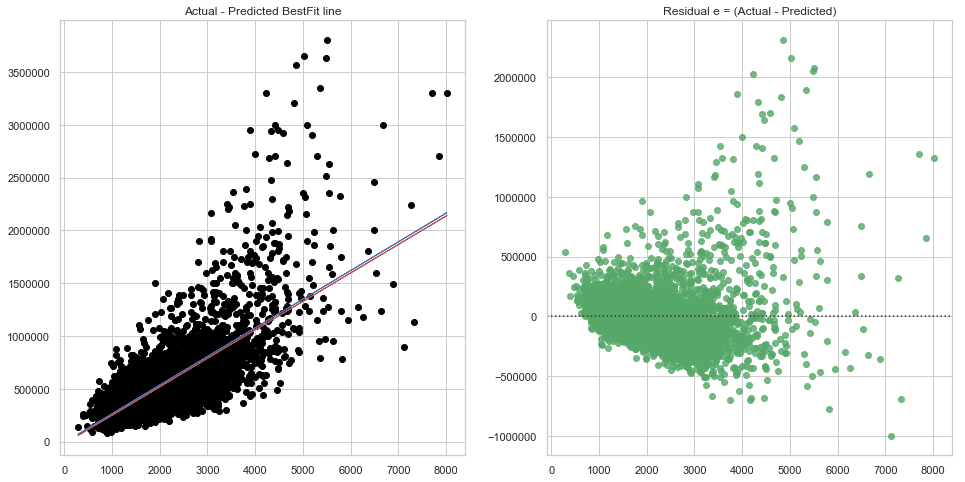

In [102]:
fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Actual - Predicted BestFit line')
plt.plot(Xtest[:,0],Ttest,'o',color='black')

##ACTUAL
[x,y,b,m] = bestfit(Xtest,Ttest)
plt.plot(x, b + m * x, '-',lw=1,color='r')

##PREDICTED
[xp,yp,bp,mp] = bestfit(Xtest,predicted_sgd)
plt.plot(xp, bp + mp * xp, '-',lw=1,color='b')

sns.set(style="whitegrid")
plt.subplot(1,2,2)
plt.title('Residual e = (Actual - Predicted)')
residual=(Ttest - predicted_sgd)
sns.residplot(np.array(Xtest[:,0]), np.array(residual), color="g")

### Analysis

We can clearly see that the result does not change much with the dropping of this feature
Although this feature din't add much value in this dataset if there is a lot of samples then this feature would have played an important role as then there is more variance associated with each feature and a small change in the model predictors will have a greater change in the result.